# Time Series Forecasting of U.S. Home Sales

Submitted by Ubaldo Martinez III, Data Analytics Graduate Capstone, Master of Science, Data Analytics, WGU

## Table of Contents
<ul>
<li><a href="#PartA">A: Research Question</a></li>
<li><a href="#PartB">B: Data Collection</a></li>
<li><a href="#PartC">C: Data Extraction & Preparation</a></li>
<li><a href="#PartC1">C1: Exploratory Data Analysis</a></li>
<li><a href="#PartD">D: Time Series Analysis & Forecasting</a></li>
<li><a href="#PartE">E: Data Summary & Implications</a></li>
<li><a href="#PartF">F: Sources</a></li>
<li><a href="#PartF">G: Code References</a></li>    
</ul>

<a id='PartA'></a>
## <span style="color:green">A: Research Question</span>

The research question for this capstone is "​Can home sales in the United States be effectively forecasted based solely on research data?"

This endeavor aims to leverage data provided by Zillow, encompassing residential property transactions spanning the years 2008 to 2017. The primary objective is to construct a robust time series forecasting model adept at predicting home sales, encompassing the entirety of 2018 and projecting into the subsequent years until 2022.​

​Zillow is a prominent online real estate marketplace that provides users with comprehensive information about properties, rentals, and home values across the United States. The platform offers a wide range of data related to real estate, including property listings, historical sales data, property values, and rental information. This data can be utilized in data analysis projects to gain insights into the real estate market, track property trends, assess property values over time, and make informed decisions related to buying, selling, or renting properties. Zillow's extensive dataset and user-friendly interface make it a valuable resource for individuals and professionals engaged in data analysis, real estate research, and market evaluation.​

The established null and alternative hypotheses for this analysis: 


​**​Null Hypothesis:** A predictive time series forecasting model with a mean absolute 	percentage error of < 20% cannot be generated from the research dataset.                          
**Alternate Hypothesis:** A predictive time series forecasting model with a mean absolute percentage error of < 20% can be generated from the research dataset.​ 

In order to discern a truly adept predictive time series forecasting model with regards to validating or refuting the null hypothesis, the ultimate refined model must exhibit a mean absolute percentage error (MAPE) of 20% or lower for its projections on the test data spanning 2018 to 2022. This stringent benchmark serves as the threshold for considering a model as "effective."

<a id='PartB'></a>
## <span style="color:green">B: Data Collection</span>

The data needed to attempt to generate a predictive ARIMA/SARIMA model is published by Zillow Research division. Data is accessible through an API, limited to real estate agents or brokers while categorized (listing prices, rentals, days-on-market) raw data is available as a downloadable file in csv format. Attempts were made to aquire a limited access API, reaching out to several home realtor associations, unfortunately receiving a consistent response of "real estate license required or pay thousands of dollars". The two datasets obtained from Zillow Research were 'Sales Count Nowcast (Raw, All Homes)' and 'ZHVI Single-Family Homes Time Series ($)'. 

Home Sales references as “Sales Count Nowcast (Raw, All Homes)” on Zillow’s research page, described as an estimated number of unique properties that sold during the month after accounting for the latency between when sales occur and when they are reported. Home Values is labeled as “ZHVI Single-Family Home Time Series ($)” and represents home values for any given region as a weighted average of the middle third of homes.  

The sales count dataset contains home sales for the top 94 metropolitan statistical areas based on the size of the region with exception to the inclusion of Fort Collins, Co (Ranked 150th). The dataset’s interval period is in months, spanning from 2008-02-29 to 2023-07-31. The zhvi dataset contains the average home value for single-family, condominiums and co-operative within the 35th to 65th percentile range. The dataset's interval period is in months, spanning from 1996-02-29 to 2023-07-31 and the inclusion of the top 895 metropolitan statistical areas in the usa based on the size of the region. The home sales and zhvi (home values) dataset encompass single-family homes, condominiums, and cooperatives. 

### Dataset Variables

<ul class="a"><b>RegionID</b>
<li>Unique ID for Regions
</ul>
<ul class="a"><b>SizeRank</b>
<li>Ranking based on the size of the region
</ul>
<ul class="a"><b>RegionName</b>
<li>The name of the metropolitan statistical area
</ul>
<ul class="a"><b>RegionType</b>
<li>All values are labeled as msa for metropolitan statistical area
</ul>
<ul class="a"><b>StateName</b>
<li>State
</ul>
<ul class="a"><b>Dates(Sales Count)</b>
<li>Home sales of a region for every month with a month-ending date
</ul>
<ul class="a"><b>Dates(ZHVI)</b>
<li>Home values in a region for every month with a month-ending date
</ul>

### Types of Home  

<ul class="a"><b>Environment</b>
<li>a single-dwelling unit, with one owner, no shared walls and on its own land.
</ul>
<ul class="a"><b>Condominium</b>
<li>an individually owned residential unit in a building or complex comprised of other residential units.
</ul>
<ul class="a"><b>Co-Operative</b>
<li>a corporation where unit owners lack complete ownership, every inhabitant assumes the role of a shareholder within this corporation.
</ul>
<br>
One of the advantages of this data gathering methodology is that it is both simple and authoritative. The data is downloaded as a seperate csv file and loaded into a dataframe with pandas 'read_csv()'. Using this function empowers a users ability to analyze the structure and the context of the data with a few lines of python code. Authorative in that Zillow gathers information from multiple sources, both public and private, allowing cross validation for accuracy before makign its research data publicly available.

One of the disadvantages of using data obtained in csv format is the extensive data cleaning and preparation required in order to produce a dataset structured for model fitting. It is always a better choice to utilize API's when it comes to obtaining data from the source as this will save time in data preparation. API's also allow a user to input data into a database where the data types can be specified and a model can be continiously given new data to improve accuracy with revalidation. To overcome the inability to use API's for this analysis, additional steps were taken during data prepartion and although not a requirement, exploratory analsysis was also performed.

No real challenges were encounterred during the retrieval of data, other than downloading multiple formats to inspect the context, structure and ultimately determine which one would be best suited for the research question. The central constraint, although not deterring model forecasting accuracy, is the limited number of metropolitan statistical areas in the home sales dataset (94) versus the home values dataset (895). To maintain data consistency only the 94 metropolitan statistical areas found in the home sales dataset will be utilized instead of all 895. home sales dataset has four metro areas with one ‘NaN’ value each and will be resolved by taking the average of the values before and after, to stand-in for this data. Another metro area has two years of missing values and will be removed entirely. The home values dataset contains a significant amount of ‘NaN’ values, most of them pertaining to smaller metro areas, therefore will require extensive cleaning. Both datasets are represented in a wide format and will require to be transformed into long format to perform exploratory data analysis and suited for model fitting.  

This analysis primarily focuses on predicting the volume of home sales. While certain aspects of exploratory data analysis will encompass property values, it's important to note that property values themselves are not the target of forecast in this study. 

<a id='PartC'></a>
## <span style="color:green">C: Data Extraction & Preparation</span>

### Techniques & Justification 

Given the Jupyter Notebook format of this submission, comprehensive details of my data extraction and preparation procedures have been meticulously documented. My code is supplemented with comments to enhance transparency regarding my data manipulation techniques. In instances where clarification was warranted, I've incorporated explanatory narratives in markdown. It's worth noting that I've even encompassed exploratory data analysis, though not obligatory for this assignment. This decision is twofold: it aligns with a comprehensive presentation and, more importantly, certain insights gleaned from the exploratory phase influence the direction of the final analysis.

### Tools

As per the rubric's stipulations, I've elucidated the tools and techniques engaged in data extraction and preparation. This encompassed evaluating both the advantages and disadvantages associated with each method, ensuring a comprehensive understanding. While the final analysis employed a broader array of packages and tools, the following enumeration pertains specifically to the extraction and preparation phase:
<br>
<ul class="a"><b>Environment</b>
<li>Jupyter Notebook 
</ul> 

<ul class="a"><b>Programming Language</b>
    <li>Python
</ul> 

<ul class="a"><b>Python Libraries</b>
    <li>Pandas
    <li>Numpy
    <li>MatPlotLib
</ul> 


### Jupyter Notebook 
Jupyter Notebook emerges as an exquisite tool for undertaking projects of this nature, particularly during the nascent phases of preparation. Its utility lies in enabling an exceptionally swift and iterative workflow. It's a common practice for me to craft a code cell that may not function precisely as intended, or might produce results that deviate from my envisioned outcome. To manage this, I preserve the original cell as a reference and proceed to iterate upon a new cell. This approach facilitates a side-by-side comparison of different code iterations, aiding the refinement process.

Moreover, this tool allows me to promptly generate new cells for displaying or extracting specific data fragments. Once I'm assured of the correct functionality, I discard extraneous debugging cells, yielding a polished and refined presentation that resonates with professionalism.

However, it's noteworthy that Jupyter's operational speed can sometimes be a drawback. This limitation made its presence felt throughout the project's development, particularly when attempting to construct multiple forecasting models. This aspect posed a notable challenge, warranting strategic management to mitigate performance lags.

### Pandas
The Python library Pandas affords me the capacity to organize all the data within a dataframe—an expansive table or spreadsheet—facilitating intricate operations. This framework streamlines data manipulation and visualization, optimizing the extraction and preparation phases.

As the complexity of operations intensifies, Pandas syntax can sometimes become intricate. This intricacy was particularly apparent while grappling with the task of addressing the missing data for December 11, 2022, as elucidated above. Rectifying this data gap demanded an extensive CASE statement, underpinned by an array of if/then conditionals. This iterative process entailed a meticulous search for values, along with the execution of operations to engender fresh dataset rows featuring newly derived data.

Ultimately, for addressing this specific quandary, I found that the most pragmatic avenue involved the construction of an extended and bespoke iterative code snippet, tailored precisely to accomplish my objectives. This decision prevailed over pursuing a vectorized solution within the Pandas ecosystem, ensuring the efficiency and precision of the undertaken task.

### NumPy
While not prominently featured in this data preparation process, the inclusion of NumPy holds significance. NumPy serves as a foundational tool leveraged by other essential packages, notably Pandas and Matplotlib, to execute an array of mathematical computations. Hence, while I rarely invoke NumPy explicitly, it is ubiquitously employed "under the hood" by diverse operations, often unbeknownst to me.

In this context, NumPy assumed a pivotal role in calculating means for specific values and constructing "best fit" lines for certain graphs during the exploratory data analysis. However, it's pertinent to acknowledge one drawback associated with NumPy. There exists a documented issue within the pmdarima package, particularly in the context of generating an auto_arima() function. This function inadvertently engenders NaN values, which subsequently disrupt the automated ARIMA process, leading to failure. Remarkably, this issue traces back to a specific operation conducted by NumPy.

This issue occasioned an entire day's worth of work, compelling me to explore alternatives to pmdarima. This quest eventually led me to the adoption of prophet, which proved significantly more advantageous in the end.

### MatPlotLib
Matplotlib serves as a vital instrument for crafting vivid visualizations and graphs, a role often shared by various Python libraries, reminiscent of NumPy's underlying contribution. Matplotlib simplifies the creation of aesthetically pleasing and instinctive data plots, as aptly demonstrated across the exploratory data analysis phase.

However, Matplotlib is not devoid of its limitations. It can, on occasion, prove somewhat intricate or manifest peculiar formatting decisions that defy easy rectification. For instance, during a juncture in my exploratory data analysis, I encountered a challenge in juxtaposing a line graph and a pie chart within a side-by-side configuration (1 row with 2 columns). Despite my efforts, the pie chart consistently shifted to the subsequent row. Ultimately, I was compelled to accede to Matplotlib's perplexing determination to render this as a 2-row, 1-column figure, with a left-aligned placement of the pie chart. This instance exemplifies Matplotlib's propensity for idiosyncratic formatting choices that can present hurdles to achieving desired layouts.

### Import Packages

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pmdarima as pm
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
from functools import reduce
import datetime as dt 

# Prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_plotly, plot_components_plotly
import logging
logging.getLogger('prophet').setLevel(logging.WARNING) 

# Warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

# Plot Customization
plt.rc("font", size=14)
plt.rcParams['font.family'] = 'Liberation Sans, sans-serif'
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use("dark_background")

### Import Data

In [116]:
# Import CSV Files Into DataFrame

# Home Sales
df_raw_sales = pd.read_csv('./Data/HomeSalesCount.csv') 

# Home Values
df_raw_values = pd.read_csv('./Data/HomeValueEstimates.csv')

# Regional Dataset (West, South, Northeast, Midwest) To Merge With Final Dataset For Exploratory Analysis
df_regions = pd.read_csv('./Data/Regions.csv')

In [117]:
# View Data As DataFrame
df_raw_sales

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,102001,0,United States,country,NaN,160561.0,188234.0,207948.0,231141.0,241849.0,...,284360.0,239996.0,228332.0,172636.0,192319.0,264119.0,244978.0,295951.0,303950.0,284008.0
1,394913,1,"New York, NY",msa,NY,7542.0,7973.0,8717.0,9067.0,9671.0,...,12747.0,11286.0,10500.0,8333.0,6911.0,8748.0,7877.0,9704.0,10417.0,7673.0
2,753899,2,"Los Angeles, CA",msa,CA,3231.0,3915.0,4687.0,5250.0,5336.0,...,5500.0,4695.0,4416.0,3583.0,3863.0,5659.0,5077.0,6075.0,6245.0,5147.0
3,394463,3,"Chicago, IL",msa,IL,4281.0,5455.0,5813.0,6383.0,7149.0,...,7753.0,6686.0,6107.0,4392.0,4551.0,7164.0,6989.0,8768.0,8818.0,7144.0
4,394514,4,"Dallas, TX",msa,TX,4886.0,5681.0,6088.0,6804.0,6775.0,...,5905.0,4830.0,4752.0,3468.0,4879.0,6164.0,5928.0,7384.0,7269.0,5536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,395006,92,"Provo, UT",msa,UT,257.0,277.0,324.0,346.0,331.0,...,425.0,365.0,318.0,261.0,359.0,426.0,416.0,427.0,468.0,399.0
90,395160,93,"Toledo, OH",msa,OH,186.0,216.0,258.0,304.0,307.0,...,555.0,414.0,403.0,287.0,302.0,374.0,397.0,458.0,559.0,393.0
91,395224,94,"Wichita, KS",msa,KS,62.0,80.0,74.0,78.0,96.0,...,189.0,141.0,135.0,107.0,98.0,165.0,100.0,96.0,162.0,144.0
92,394549,95,"Durham, NC",msa,NC,333.0,433.0,483.0,676.0,689.0,...,580.0,496.0,484.0,371.0,427.0,633.0,589.0,705.0,784.0,557.0


In [118]:
# View Data As DataFrame
df_raw_values

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,102001,0,United States,country,NaN,116360.238308,116558.752388,116804.876375,117333.290932,117941.312554,...,344025.696396,343075.759515,341914.551409,341175.973817,341067.039222,342218.887412,343415.303169,345026.590141,346909.866417,348960.901772
1,394913,1,"New York, NY",msa,NY,199102.653241,199946.761871,200795.107938,202511.449448,204279.968278,...,619892.744498,618127.832991,615818.825566,615608.429126,616062.390737,618905.352895,621195.915530,624753.970830,629512.502801,635192.377680
2,753899,2,"Los Angeles, CA",msa,CA,237950.658158,238849.860950,240024.976511,242381.090576,244947.207714,...,946863.973904,943136.674437,938535.279375,928369.961542,916430.584481,908023.018316,906607.922217,911524.163260,920651.384494,934642.169164
3,394463,3,"Chicago, IL",msa,IL,150215.945124,150364.152279,150633.116649,151309.536171,152113.609522,...,308736.039352,307908.793062,307217.203881,307587.379294,308576.779595,310542.975060,312219.473752,314300.630590,317056.210006,319961.599372
4,394514,4,"Dallas, TX",msa,TX,131567.602095,131633.208425,131712.235311,131905.773488,132147.539374,...,383734.191241,381803.697791,379231.638746,376579.269928,374452.260210,373744.092406,373488.638733,373977.731650,375087.887750,376496.982526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,113028.670822,110684.145167,109092.206328,111236.413680,114576.581593,118577.672426,119707.282303,120403.009580,121101.567423,122074.980925
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,447207.074409,446185.659292,443966.611311,441127.516240,439391.716587,439588.848435,440722.844946,441669.405435,440535.684915,438087.497910
892,753874,937,"Craig, CO",msa,CO,96340.197471,96598.651035,97062.343302,97727.707122,98487.529968,...,259817.379968,261413.574578,262793.854830,263902.231508,266051.883209,269330.990762,273383.653894,277075.273125,280753.902732,283511.734323
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,93982.520258,93113.259042,91519.030555,93178.534934,95610.721991,98758.394873,99379.387350,99536.672403,98401.708349,96485.342496


### Drop & Rename Columns

In [119]:
# Drop Columns Not Required For This Analysis
df_raw_sales = df_raw_sales.drop(columns=['SizeRank', 'RegionType', 'RegionID'], axis=1)
df_raw_values = df_raw_values.drop(columns=['SizeRank', 'RegionType', 'RegionID'], axis=1)

# Rename Columns To Better Aligned With Its Values
df_raw_sales = df_raw_sales.rename(columns={'StateName':'StateCode', 'RegionName':'City'})
df_raw_values = df_raw_values.rename(columns={'StateName':'StateCode', 'RegionName':'City'})

# Drop First Row Containing 'United States' Data
df_raw_sales = df_raw_sales.drop(index=[0])
df_raw_values = df_raw_values.drop(index=[0])

### Wide To Long Format

In [120]:
# Dataset Needs To Be Converted From Wide Format To Long Format
df_long_sales = pd.melt(df_raw_sales, id_vars=['City', 'StateCode'], var_name='Date', value_name='Sold')
df_long_values = pd.melt(df_raw_values, id_vars=['City', 'StateCode'], var_name='Date', value_name='Value')

In [121]:
# Inspect DataTypes
df_long_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17298 entries, 0 to 17297
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       17298 non-null  object 
 1   StateCode  17298 non-null  object 
 2   Date       17298 non-null  object 
 3   Sold       17268 non-null  float64
dtypes: float64(1), object(3)
memory usage: 540.7+ KB


In [122]:
# Inspect DataTypes
df_long_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253002 entries, 0 to 253001
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   City       253002 non-null  object 
 1   StateCode  253002 non-null  object 
 2   Date       253002 non-null  object 
 3   Value      203741 non-null  float64
dtypes: float64(1), object(3)
memory usage: 7.7+ MB


### Normalize & Convert Dates

In [123]:
df_long_sales

,City,StateCode,Date,Sold
0,"New York, NY",NY,2008-02-29,7542.0
1,"Los Angeles, CA",CA,2008-02-29,3231.0
2,"Chicago, IL",IL,2008-02-29,4281.0
3,"Dallas, TX",TX,2008-02-29,4886.0
4,"Houston, TX",TX,2008-02-29,3901.0
...,...,...,...,...
17293,"Provo, UT",UT,2023-07-31,399.0
17294,"Toledo, OH",OH,2023-07-31,393.0
17295,"Wichita, KS",KS,2023-07-31,144.0
17296,"Durham, NC",NC,2023-07-31,557.0


In order to have a consistent frequency and prevent the usage of certain elements of time series analysis later on, issues such as the numerical month-ending day, need to be resolved. To have all dates start on the first day of the month and create consistent monthly intervals, the first step will be to convert the datatype for `Date` from `datetime64[ns]` to `object`. Next, normalize using `dt.normalie()` and finally use numpy to convert all `Date` values to a series of monthly dates starting with `01` instead of the last day of the month.

In [124]:
# Sort Data By City & Date
df_sorted_sales = df_long_sales.sort_values(by=['City','Date'])
df_sorted_values = df_long_values.sort_values(by=['City','Date'])

In [125]:
# Convert Columns To 'datetime64[ns]' For Both Datasets
df_sorted_sales['Date'] = pd.to_datetime(df_sorted_sales['Date'].astype(str), format='%Y-%m-%d')
df_sorted_values['Date'] = pd.to_datetime(df_sorted_values['Date'].astype(str), format='%Y-%m-%d')

# Normalize Date Column
df_sorted_sales['Date'] = df_sorted_sales['Date'].dt.normalize() 
df_sorted_values['Date'] = df_sorted_values['Date'].dt.normalize() 

# Convert All Dates From Month-End To Month-Beg To Have Consistent Periods Of Exactly 1 Month
df_sorted_sales['Date'] = df_sorted_sales['Date'].dt.to_period('M').apply(lambda r: r.start_time)
df_sorted_values['Date'] = df_sorted_values['Date'].dt.to_period('M').apply(lambda r: r.start_time)

In [126]:
df_sorted_sales

,City,StateCode,Date,Sold
80,"Akron, OH",OH,2008-02-01,211.0
173,"Akron, OH",OH,2008-03-01,242.0
266,"Akron, OH",OH,2008-04-01,290.0
359,"Akron, OH",OH,2008-05-01,314.0
452,"Akron, OH",OH,2008-06-01,424.0
...,...,...,...,...
16889,"Worcester, MA",MA,2023-03-01,588.0
16982,"Worcester, MA",MA,2023-04-01,559.0
17075,"Worcester, MA",MA,2023-05-01,733.0
17168,"Worcester, MA",MA,2023-06-01,1016.0


In [127]:
df_sorted_values

,City,StateCode,Date,Value
657,"Aberdeen, SD",SD,2000-01-01,NaN
1551,"Aberdeen, SD",SD,2000-02-01,NaN
2445,"Aberdeen, SD",SD,2000-03-01,NaN
3339,"Aberdeen, SD",SD,2000-04-01,NaN
4233,"Aberdeen, SD",SD,2000-05-01,NaN
...,...,...,...,...
249421,"Zapata, TX",TX,2023-03-01,118577.672426
250315,"Zapata, TX",TX,2023-04-01,119707.282303
251209,"Zapata, TX",TX,2023-05-01,120403.009580
252103,"Zapata, TX",TX,2023-06-01,121101.567423


Both datasets are now showing a consistent date starting at the beginning of the month.

In [128]:
# Drop Columns With Dates Before 2008-02-01 & After 2022-12-01
df_sorted_sales = df_sorted_sales[(df_sorted_sales['Date'] >= '2008-02-01') & (df_sorted_sales['Date'] <= '2022-12-01')]
df_sorted_values = df_sorted_values[(df_sorted_values['Date'] >= '2008-02-01') & (df_sorted_values['Date'] <= '2022-12-01')]

Before merging both datasets sales and values, rows with dates before `2008-02-01` and after `2022-12-01` on the values dataset will be dropped. On the sales dataset, no rows exist prior to `2008-02-01`, only after `2022-12-01`. 

In [129]:
# Verify Columns With Dates Before 2008-02-01 & After 2022-12-01 Were Dropped For 'df_sorted_sales'
pd.DataFrame(df_sorted_sales['Date'])

,Date
80,2008-02-01
173,2008-03-01
266,2008-04-01
359,2008-05-01
452,2008-06-01
...,...
16238,2022-08-01
16331,2022-09-01
16424,2022-10-01
16517,2022-11-01


In [130]:
# Verify Columns With Dates Before 2008-02-01 & After 2022-12-01 Were Dropped For 'df_sorted_values'
pd.DataFrame(df_sorted_values['Date'])

,Date
87375,2008-02-01
88269,2008-03-01
89163,2008-04-01
90057,2008-05-01
90951,2008-06-01
...,...
243163,2022-08-01
244057,2022-09-01
244951,2022-10-01
245845,2022-11-01


Both datasets now are consistent with the number of months and are able to proceed to merging.

### Merge Datasets

In [131]:
# Verify All Cities In HomeSalesCount Are In HomeValueEstimates
df_sorted_values['City'].isin(df_sorted_sales['City']).value_counts()

City
False    143379
True      16647
Name: count, dtype: int64

Results indicate 'df_sorted_values' contains all cities in 'df_sorted_sales' based on number of 'True' rows

In [132]:
# Merge Both Datasets Using 'df_sorted_sales' As Key
df_merged = pd.merge(df_sorted_sales, df_sorted_values, on=['City', 'StateCode', 'Date'], how='left')

# Verify No Duplicate Columns Exist
pd.DataFrame(df_merged)

,City,StateCode,Date,Sold,Value
0,"Akron, OH",OH,2008-02-01,211.0,128994.756208
1,"Akron, OH",OH,2008-03-01,242.0,128791.343200
2,"Akron, OH",OH,2008-04-01,290.0,128743.961854
3,"Akron, OH",OH,2008-05-01,314.0,128928.823088
4,"Akron, OH",OH,2008-06-01,424.0,128905.008055
...,...,...,...,...,...
16642,"Worcester, MA",MA,2022-08-01,1304.0,429568.563020
16643,"Worcester, MA",MA,2022-09-01,1122.0,427882.546033
16644,"Worcester, MA",MA,2022-10-01,1017.0,426453.301878
16645,"Worcester, MA",MA,2022-11-01,786.0,425850.117898


### Resolve Missing Values

In [133]:
# Check For 'NaN' In Both 'Sold' & 'Value' Columns
nan_df = df_merged.isna()
has_nan = nan_df.any(axis=1)
result = df_merged[has_nan]
result

,City,StateCode,Date,Sold,Value
3768,"Columbia, SC",SC,2008-11-01,350.0,NaN
4981,"Detroit, MI",MI,2020-06-01,NaN,185044.179380
5163,"Durham, NC",NC,2020-09-01,889.0,NaN
7618,"Las Vegas, NV",NV,2016-06-01,NaN,242978.195468
8413,"McAllen, TX",TX,2008-02-01,NaN,75239.126456
8414,"McAllen, TX",TX,2008-03-01,NaN,75207.287469
8415,"McAllen, TX",TX,2008-04-01,NaN,75232.920041
8416,"McAllen, TX",TX,2008-05-01,NaN,75439.712424
8417,"McAllen, TX",TX,2008-06-01,NaN,75541.290127
8418,"McAllen, TX",TX,2008-07-01,NaN,75556.619736


Drop `McAllen,TX` since its missing 2 years worth of data compared to the other cities.

In [134]:
# Drop All Rows Containing The 'City' of 'McAllen, TX'
df_merged = df_merged.drop(df_merged[df_merged['City'] == 'McAllen, TX'].index)

In [135]:
# Re-Check For 'NaN' In Both 'Sold' & 'Value' Columns
# pd.set_option('display.max_rows', None)
nan_df = df_merged.isna()
has_nan = nan_df.any(axis=1)
result = df_merged[has_nan]
result

,City,StateCode,Date,Sold,Value
3768,"Columbia, SC",SC,2008-11-01,350.0,NaN
4981,"Detroit, MI",MI,2020-06-01,NaN,185044.179380
5163,"Durham, NC",NC,2020-09-01,889.0,NaN
7618,"Las Vegas, NV",NV,2016-06-01,NaN,242978.195468
9876,"New York, NY",NY,2010-09-01,NaN,360309.375057
13958,"San Jose, CA",CA,2022-09-01,1169.0,NaN


The `interpolate()` method will be utilized to fill missing values.

In [136]:
# Interpolate Missing Values & Reset Index
df_merged = df_merged.interpolate().reset_index(drop=True)

In [137]:
# Re-Check For 'NaN' In Both 'Sold' & 'Value' Columns
nan_df = df_merged.isna()
has_nan = nan_df.any(axis=1)
result = df_merged[has_nan]
result

,City,StateCode,Date,Sold,Value


In [138]:
# Check For Null Values
df_merged[df_merged.isnull().any(axis=1)]

,City,StateCode,Date,Sold,Value


In [139]:
# Check For Missing Values In DataFrame
df_merged.isna().sum()

City         0
StateCode    0
Date         0
Sold         0
Value        0
dtype: int64

All columns indicate a zero, demonstrating no missing values or null. After checking for 'NaN' values, the metro area of `McAllen, TX` had over 2 years of missing data and decided it would be best to remove it completely from the dataset. The other `NaN` values were one-instances and taken care of with `interpolate()`. This method estimates missing values by creating a straight line between adjacent data points and filling in the missing values based on the average of adjacent points. 

In [140]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       16468 non-null  object        
 1   StateCode  16468 non-null  object        
 2   Date       16468 non-null  datetime64[ns]
 3   Sold       16468 non-null  float64       
 4   Value      16468 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 643.4+ KB


### Inner Join Region Dataset

In [141]:
# Merge 'df_merged' & 'df_regions' Datasets On StateCode As Key
df_final = pd.merge(df_merged, df_regions, on=['StateCode'], how='left').drop(columns=['State'], axis=1)

# Verify Changes
pd.DataFrame(df_final)

,City,StateCode,Date,Sold,Value,Region
0,"Akron, OH",OH,2008-02-01,211.0,128994.756208,Midwest
1,"Akron, OH",OH,2008-03-01,242.0,128791.343200,Midwest
2,"Akron, OH",OH,2008-04-01,290.0,128743.961854,Midwest
3,"Akron, OH",OH,2008-05-01,314.0,128928.823088,Midwest
4,"Akron, OH",OH,2008-06-01,424.0,128905.008055,Midwest
...,...,...,...,...,...,...
16463,"Worcester, MA",MA,2022-08-01,1304.0,429568.563020,Northeast
16464,"Worcester, MA",MA,2022-09-01,1122.0,427882.546033,Northeast
16465,"Worcester, MA",MA,2022-10-01,1017.0,426453.301878,Northeast
16466,"Worcester, MA",MA,2022-11-01,786.0,425850.117898,Northeast


In [142]:
# Reindex Order Of Columns & Convert To Lower Case Column Names
df_final.reindex(['City', 'StateCode', 'Region', 'Date', 'Sold', 'Value'], axis=1)

df_final.rename(columns={'City':'city', 'StateCode':'statecode', 
                                    'Region':'region', 'Date':'date', 'Sold':'sold', 'Value':'value'}, inplace=True)

# Verify Changes
pd.DataFrame(df_final)

,city,statecode,date,sold,value,region
0,"Akron, OH",OH,2008-02-01,211.0,128994.756208,Midwest
1,"Akron, OH",OH,2008-03-01,242.0,128791.343200,Midwest
2,"Akron, OH",OH,2008-04-01,290.0,128743.961854,Midwest
3,"Akron, OH",OH,2008-05-01,314.0,128928.823088,Midwest
4,"Akron, OH",OH,2008-06-01,424.0,128905.008055,Midwest
...,...,...,...,...,...,...
16463,"Worcester, MA",MA,2022-08-01,1304.0,429568.563020,Northeast
16464,"Worcester, MA",MA,2022-09-01,1122.0,427882.546033,Northeast
16465,"Worcester, MA",MA,2022-10-01,1017.0,426453.301878,Northeast
16466,"Worcester, MA",MA,2022-11-01,786.0,425850.117898,Northeast


### Generate Final DataFrames

In [143]:
# Generate Final Home Sales Dataframe For Exploratory Analsys & Model
us_sales = df_final.drop(columns={'statecode', 'value', 'region'}, axis=1)

# Convert Date From datetime64[ns] To Object
us_sales['date'] = pd.to_datetime(us_sales['date'].astype(str), format='%Y-%m-%d')

# Set Date As Index
us_sales.set_index('date', inplace=True)

# Sort & Group By City Then Date
us_sales.sort_values(by=['city', 'date']).groupby(['city', 'date'])

# Drop City Column, Group By Date & Calculate Totals By Date
us_sales = us_sales.drop(columns={'city'}, axis=1).groupby('date').sum()

# Divide Home Sales By 1000
us_sales['sold'] = us_sales['sold'] / 1000
us_sales

,sold
date,
2008-02-01,109.133
2008-03-01,128.569
2008-04-01,142.031
2008-05-01,155.931
2008-06-01,164.737
...,...
2022-08-01,239.056
2022-09-01,213.759
2022-10-01,186.286


In [144]:
# Generate Final Home Sales Dataframe For Exploratory Analsys & Model
us_values = df_final.drop(columns={'statecode', 'sold', 'region'}, axis=1)

# Convert Date From datetime64[ns] To Object
us_values['date'] = pd.to_datetime(us_values['date'].astype(str), format='%Y-%m-%d')

# Set Date As Index
us_values.set_index('date', inplace=True)

# Sort & Group By City Then Date
us_values.sort_values(by=['city', 'date']).groupby(['city', 'date'])

# Drop City Column, Group By Date & Calculate Totals By Date
us_values = us_values.drop(columns={'city'}, axis=1).groupby('date').mean()
us_values

,value
date,
2008-02-01,238828.541000
2008-03-01,236678.902591
2008-04-01,234494.806835
2008-05-01,232320.675861
2008-06-01,230125.336316
...,...
2022-08-01,419312.063909
2022-09-01,416709.014120
2022-10-01,414298.821218


In [145]:
print(f"There Are {df_final['region'].nunique()} Regions In The Dataset.")
print(f"There Are {df_final['city'].nunique()} Distinct Metropolitan Areas In The Dataset.")
print(f"There Are {df_final['statecode'].nunique()} Distinct States In The Dataset.")
print(f"There Are {len(df_final['statecode'])} Total Rows In The Dataset.")
print(f"There Are {us_sales['sold'].nunique()} Months Of Home Sales For Each Metropolitan Area In The Dataset.")
print(f"There Are {us_values['value'].nunique()} Months Of Home Values For Each Metropolitan Area In The Dataset.")


There Are 4 Regions In The Dataset.
There Are 92 Distinct Metropolitan Areas In The Dataset.
There Are 38 Distinct States In The Dataset.
There Are 16468 Total Rows In The Dataset.
There Are 179 Months Of Home Sales For Each Metropolitan Area In The Dataset.
There Are 179 Months Of Home Values For Each Metropolitan Area In The Dataset.


### Export Final DataFrames To CSV Format

In [146]:
# Export Full Dataset
df_final.to_csv('./Data/all_columns_2008_2022_clean.csv', index=True)
# Export Home Sales Dataset (Exploratory Analysis & Time Series Forecasting)
us_sales.to_csv('./Data/us_sales_2008_2022_clean.csv', index=True)
# Export Home Values Dataset (Exploratory Analysis)
us_values.to_csv('./Data/us_values_2008_2022_clean.csv', index=True)

<a id='PartC1'></a>
## <span style="color:green">C1: Exploratory Data Analysis</span>

All three datasets generated in the previous section, can now be visualized with plots to perform an exploratory analysis.

- US Home Sales: `df_sales`
- Average US Home Values: `us_values`
- Home Sales By Region: `df_final`
- Average Home Values By Region: `df_final`
- Portioned Home Sales By Region: `df_final`

### US Home Sales

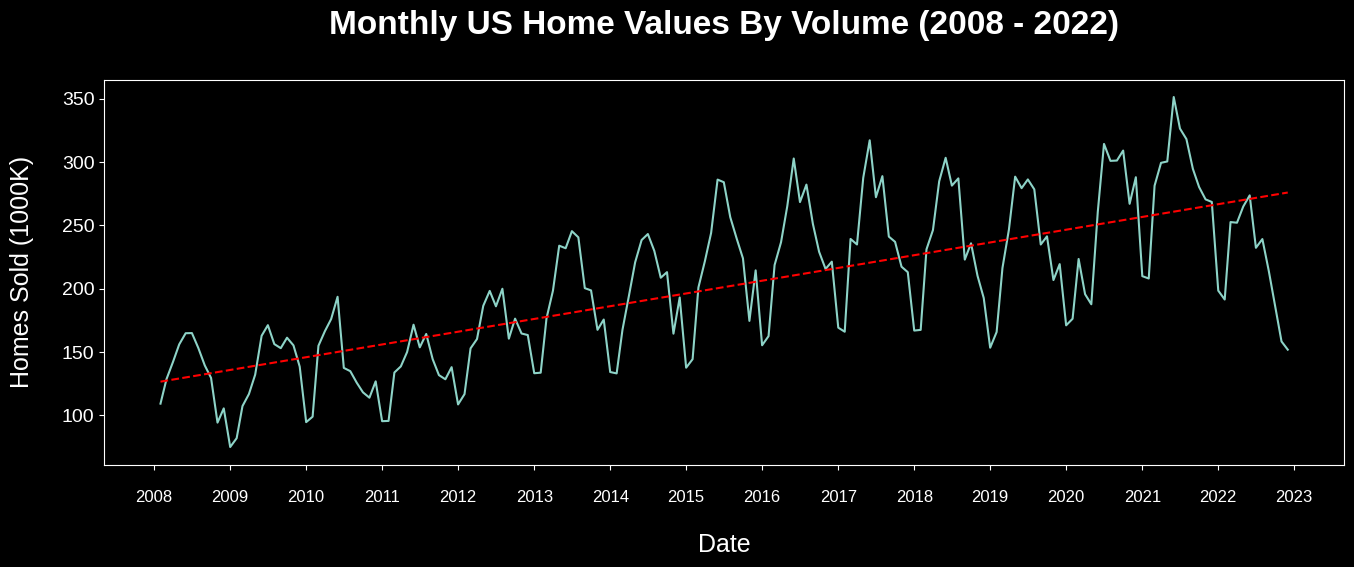

In [147]:
# Customize Graph
fig, ax = plt.subplots(figsize=(16, 5))

plt.title("Monthly US Home Values By Volume (2008 - 2022)",
          fontweight='bold', fontsize=24, color='white', 
          y=1.05, pad=14, verticalalignment='bottom', horizontalalignment='center')
plt.xlabel("Date", fontsize=18, color='white', labelpad=20)
plt.ylabel("Homes Sold (1000K)", fontsize=18, color='white', labelpad=20, rotation=90)
plt.tick_params(axis='x', labelsize=12, pad=15, rotation=0)
plt.xlim=["2008-02-01", "2022-12-01"]
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator())

# Plot Time Series Data
plt.plot(us_sales)

# Generate Trend Line
x = mdates.date2num(us_sales.index)
y = us_sales['sold']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot Trend Line
plt.plot(x, p(x), "r--")
plt.show()

Based on plot, a clear indication of trending and seasonality may be observed. The huge drop after 2021 is definetly an indication of "exogenous factors". Exogenous factors are external elements that exert an influence on the observed data points, which can lead to deviations from the expected trends and seasonal patterns.

### Average US Home Values

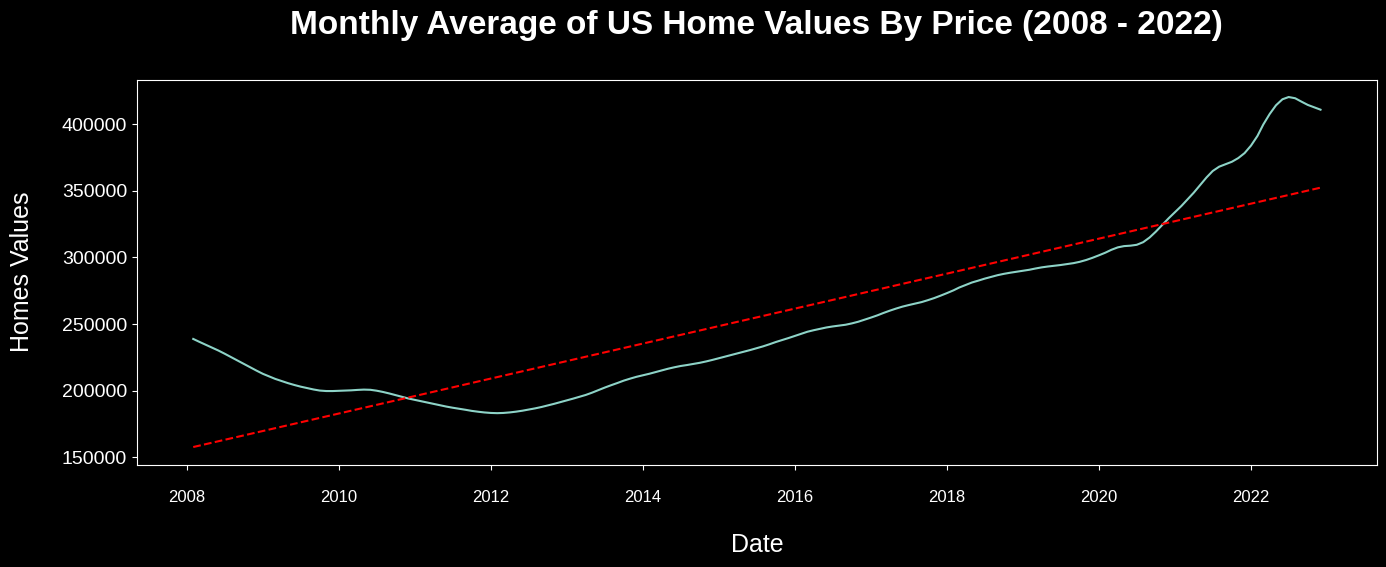

In [148]:
# Customize Graph
plt.title("Monthly Average of US Home Values By Price (2008 - 2022)",
          fontweight='bold', fontsize=24, color='white', 
          y=1.05, pad=14, verticalalignment='bottom', horizontalalignment='center')
plt.xlabel("Date", fontsize=18, color='white', labelpad=20)
plt.ylabel("Homes Values", fontsize=18, color='white', labelpad=20, rotation=90)
plt.tick_params(axis='x', labelsize=12, pad=15, rotation=0)

# Plot Time Series Data
plt.plot(us_values)

# Generate Trend Line
x = mdates.date2num(us_values.index)
y = us_values['value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot Trend Line
plt.plot(x, p(x), "r--")
plt.show()

This is where the plot gets interesting, no pun intended. In the previous plot we observed a significant drop in us home sales after 2021, while this plot demonstrating us home values begins a steeper uptrend. A rapid uptrend is usually an indication of market demand due to a limited supply, perhaps people weren't listing homes for sale, driving market demand. This dataset won't be utilized in the time series forecasting model, but it would be worth looking into for further analysis.

### Home Sales By Region

In [149]:
# Create DataFrame Of Home Sales By Region & Drop Columns Not Required For This Analysis
region_sales = df_final.drop(columns={'city', 'statecode', 'value'}, axis=1)

# Convert Date From datetime64[ns] To Object
region_sales['date'] = pd.to_datetime(region_sales['date'].astype(str), format='%Y-%m-%d')

# Set Date As Index
region_sales.set_index('date', inplace=True)

# Group By Region, Date Then Calculate Totals Home Sales By Date
region_sales.sort_values(by=['region', 'date']).groupby(['region', 'date']).sum()

# Divide Data By Region, Drop Region Column, & Rename Sold Column As The Region The Data Pertains Too
West = region_sales[region_sales['region'] == 'West'].drop(columns={'region'}, axis=1).rename(columns={'sold':'West'}).groupby('date').sum()
South = region_sales[region_sales['region'] == 'South'].drop(columns={'region'}, axis=1).rename(columns={'sold':'South'}).groupby('date').sum()
Midwest = region_sales[region_sales['region'] == 'Midwest'].drop(columns={'region'}, axis=1).rename(columns={'sold':'Midwest'}).groupby('date').sum()
Northeast = region_sales[region_sales['region'] == 'Northeast'].drop(columns={'region'}, axis=1).rename(columns={'sold':'Northeast'}).groupby('date').sum()

# Merge All 4 Regions Back Into One DataFrame
region_list = [West, South, Midwest, Northeast]
region_sales_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), region_list)

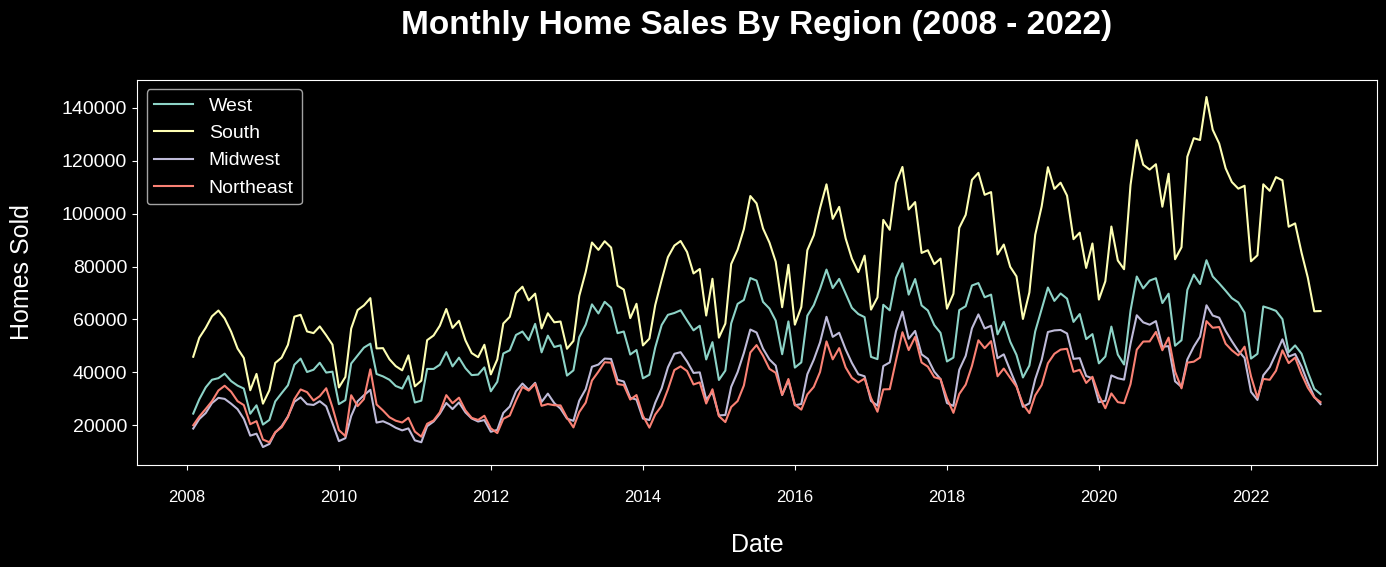

In [150]:
# Customize Graph
plt.title("Monthly Home Sales By Region (2008 - 2022)",
          fontweight='bold', fontsize=24, color='white', 
          y=1.05, pad=14, verticalalignment='bottom', horizontalalignment='center')
plt.xlabel("Date", fontsize=18, color='white', labelpad=20)
plt.ylabel("Homes Sold", fontsize=18, color='white', labelpad=20, rotation=90)
plt.tick_params(axis='x', labelsize=12, pad=15, rotation=0)

# Plot Time Series Data
plt.plot(region_sales_merged['West']);
plt.plot(region_sales_merged['South']);
plt.plot(region_sales_merged['Midwest']);
plt.plot(region_sales_merged['Northeast']);
plt.legend(['West', 'South', 'Midwest', 'Northeast'])
plt.show()


The plot has a resemblance to the US Home Sales, specifically the south region, having both trend and seasonality. The south region consist of all the southern states with texas and florida making up a good chunk of the top metro areas. The west region shows seasonality but not much of a trend. The two remaining regions of northeast and midwest have clear seasonality but almost no trend at all. Data points showing significant trends are the ones which are impacted more significantly in response to "exogenous factors",

### Average Home Values By Region

In [151]:
# Create DataFrame Of Home Values By Region & Drop Columns Not Required For This Analysis
region_values = df_final.drop(columns={'city', 'statecode', 'sold'}, axis=1)

# Convert Date From datetime64[ns] To Object
region_values['date'] = pd.to_datetime(region_values['date'].astype(str), format='%Y-%m-%d')

# Set Date As Index
region_values.set_index('date', inplace=True)

# Group By Region, Date Then Calculate Average Home Values By Date
region_values.sort_values(by=['region', 'date']).groupby(['region', 'date']).mean()

# Divide Data By Region, Drop Region Column, & Rename Value Column As The Region The Data Pertains Too
West = region_values[region_values['region'] == 'West'].drop(columns={'region'}, axis=1).rename(columns={'value':'West'}).groupby('date').mean()
South = region_values[region_values['region'] == 'South'].drop(columns={'region'}, axis=1).rename(columns={'value':'South'}).groupby('date').mean()
Midwest = region_values[region_values['region'] == 'Midwest'].drop(columns={'region'}, axis=1).rename(columns={'value':'Midwest'}).groupby('date').mean()
Northeast = region_values[region_values['region'] == 'Northeast'].drop(columns={'region'}, axis=1).rename(columns={'value':'Northeast'}).groupby('date').mean()

# Merge All 4 Regions Back Into One DataFrame
region_list = [West, South, Midwest, Northeast]
region_values_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), region_list)

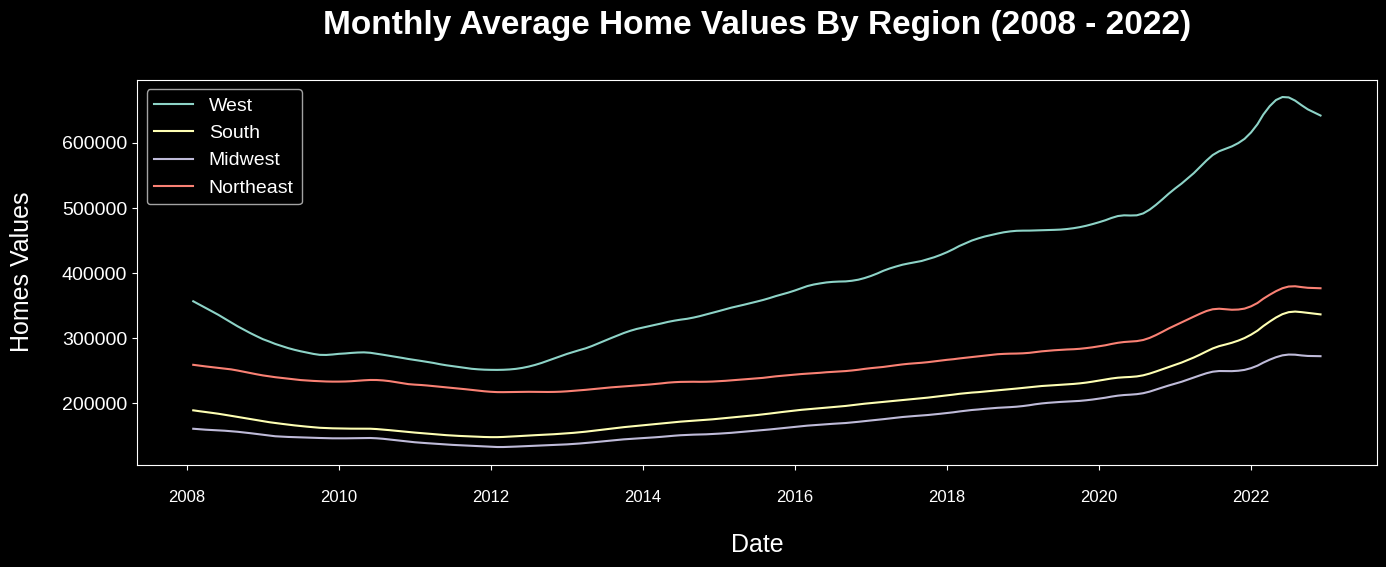

In [152]:
# Customize Graph
plt.title("Monthly Average Home Values By Region (2008 - 2022)",
          fontweight='bold', fontsize=24, color='white', 
          y=1.05, pad=14, verticalalignment='bottom', horizontalalignment='center')
plt.xlabel("Date", fontsize=18, color='white', labelpad=20)
plt.ylabel("Homes Values", fontsize=18, color='white', labelpad=20, rotation=90)
plt.tick_params(axis='x', labelsize=12, pad=15, rotation=0)

# Plot Time Series Data
plt.plot(region_values_merged['West']);
plt.plot(region_values_merged['South']);
plt.plot(region_values_merged['Midwest']);
plt.plot(region_values_merged['Northeast']);
plt.legend(['West', 'South', 'Midwest', 'Northeast'])
plt.show();

Conversely, the western region, marked by a display of seasonality and a subdued sales trend, undergoes a swift and notable upward surge. The data imparts that the trajectory of home values was already on an ascending trajectory prior to the influence of exogenous factors. This intriguing insight underscores the notion that regional dynamics and external forces interact in complex ways, shaping the course of home values. This facet merits deeper exploration for a more comprehensive analysis.

### Portioned Home Sales By Region

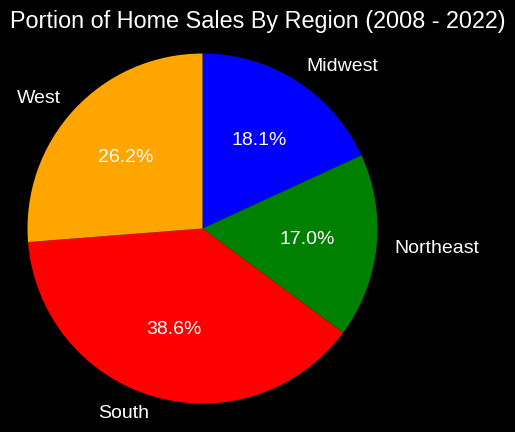

In [153]:

# Create DataFrame Of Sales By Region
sales_by_region = df_final[['region', 'sold']].groupby(['region']).sum()
fbcolor = ["blue", "green", "red", "orange"]

# Plot Time Series Data
plt.title("Portion of Home Sales By Region (2008 - 2022)", loc='left')
plt.pie(sales_by_region['sold'], labels = sales_by_region.index, autopct='%1.1f%%', 
        startangle = 90, counterclock = False, colors=fbcolor, textprops={'color':"w"})
plt.axis('square');

The pie charts introduce an alternative lens through which to gauge the distribution of data concerning home sales across various regions. Particularly illuminating is the representation of each region's contribution within the broader context. Notably, the southern region emerges as the frontrunner, commanding the largest share at 38.6%. This substantial portion effectively constitutes nearly 40% of the entirety of home sales encompassed within the dataset. This insight underscores the pivotal role played by the southern region in shaping the overall landscape of home sales data.

<a id='PartD'></a>
## <span style="color:green">D: Time Series Analysis & Forecasting of Home Sales by Volume</span>

The dataset presents us with the opportunity to conduct an intricate time series analysis of the home sales volume. The visual representations above eloquently illustrate the existence of both a discernible trend and evident seasonality embedded within this dataset. This alignment with our intuitive assumptions is not unexpected, as we naturally anticipate the real estate market to exhibit a certain degree of seasonal variation influenced by factors like the growing season. A deeper examination of this phenomenon is attainable through a meticulous decomposition of the series, which systematically dissects its constituent elements: trend, seasonality, and residuals.

### ARIMA

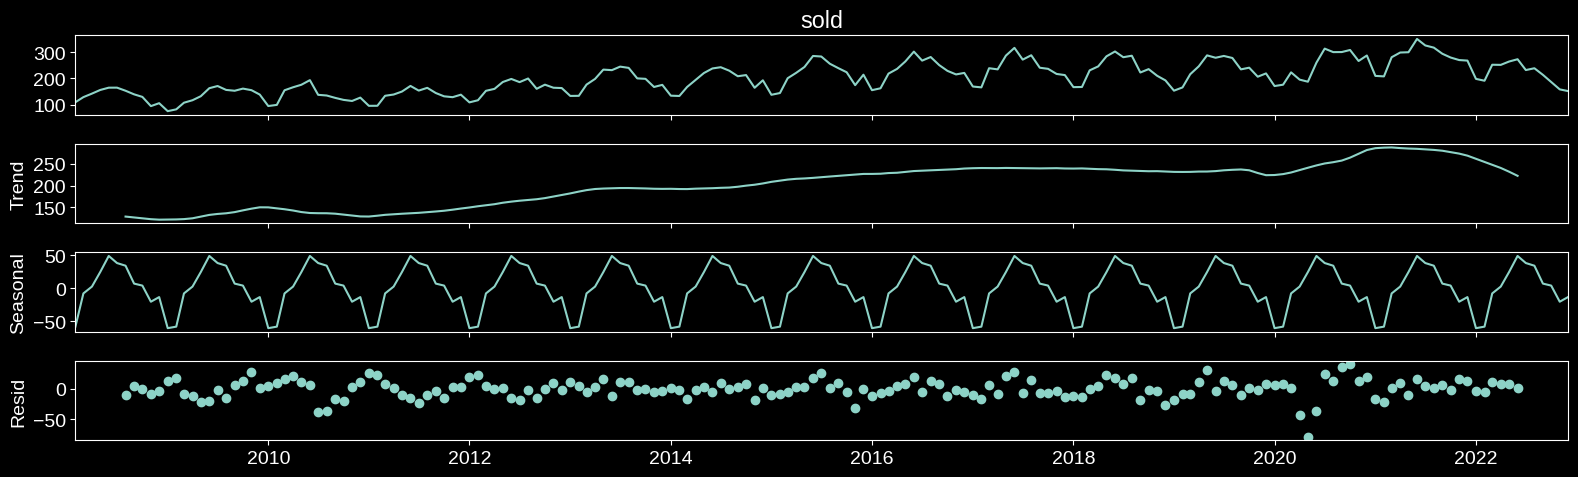

In [154]:
# Create A Copy Of us_sales
us_sales = us_sales['sold'].copy()

# Set Frequency Of Series To Be Monthly
us_sales.index.freq='MS'

# Decompose Volume Series To View The Trend, The Seasonal & The Residual Elements
sales_decomposition = seasonal_decompose(us_sales)
sales_trend = sales_decomposition.trend
sales_seasonal = sales_decomposition.seasonal
sales_residual = sales_decomposition.resid

sales_decomposition.plot();

The volume of home sales exhibits a consistent upward trajectory until extraneous factors reverse the trend, aligning with the observations made during the exploratory data analysis earlier. It is somewhat remarkable that the sales have experienced a decline throughout the entire duration of the study.The inherent seasonality of the dataset is conspicuously evident in the aforementioned plot, characterized by distinct annual patterns. Considering the dataset's monthly frequency and the recurring nature of these patterns on a yearly basis, it logically implies a seasonality interval of 12 periods.

The dataset will be partitioned into a training set encompassing data from the years 2008 through 2017, accounting for 66% of the dataset, and a test set encompassing data from the years 2018 through 2022, constituting 33% of the dataset. Although the test set size slightly surpasses the ideal range (typically 20-30% of the training set), it preserves an entire year of data within the test set. Opting for a smaller test set, around 25% of the total dataset, would amalgamate the early-year peak data from 2018 into the larger training set, thereby inducing a bias where the test set would predominantly feature diminishing late-year values, while the training set would carry an additional peak of data from the initial months of 2018. Adhering to a test size of 33% mitigates the intention of biasing either the training or test sets and stands as the most equitable solution to establish a meaningful training and testing partition, considering the constraints of limited data.

The endeavor to construct an efficacious time series forecast for the sales volume in 2018 through 2002 will commence with an initial ARIMA model, serving as a foundational benchmark. Subsequently, a SARIMA model will be formulated to assimilate the inherent data seasonality. Preceding the creation of an ARIMA/SARIMA model, it is imperative to mitigate the trend, thus instilling stationarity within the data. However, the data's seasonality will be retained, and an endeavor will be made to address it through the utilization of a SARIMA model, thereby enabling the projection of the detrended data. The reintroduction of the trend to this projected data will present the forecast in a comprehensible manner, departing from the detrended presentation.

In instances where the ARIMA/SARIMA models do not yield an optimally predictive outcome, the exploration will transition to generating a model utilizing "prophet," an approach that incorporates algorithms beyond Auto Regression/Moving Average. Should a promising model materialize with "prophet," a phase of hyperparameter tuning will ensue to fine-tune this model. Notably, "prophet" obviates the need for data detrending or deseasonalization, thereby employing the detrended sales volume data to yield forecasts that incorporate the trend, akin to the output of the ARIMA/SARIMA models.

The forecast plots generated by each model will encompass the complete dataset, sans detrending, thereby enabling an equitable comparative analysis. To gauge the performance disparities among various models, the root mean squared error (RMSE) of each model's 2018-2022 forecast will be computed. Models boasting lower RMSE values inherently signify enhanced predictive efficacy. This iterative process will entail the utilization of diverse models, culminating in the pursuit of an optimized "final" model, subjected to the calculation of its mean absolute percentage error (MAPE) to ascertain the acceptance or rejection of the null hypothesis.

The adoption of RMSE as an evaluation metric holds the advantage of facile computation through the utilization of scikit-learn's `mean_squared_error()` function with the `squared=False` parameter, affording a swift and straightforward model comparison. However, the drawback of RMSE resides in its incapacity to discern objectively between a "favorable" or "unfavorable" RMSE, as it is contingent upon the units of the forecasted values. Contrastingly, in alternative scenarios, such an RMSE could indicate a suboptimal model. In the absence of standardization, the assertion of "this model has an RMSE of x" lacks stand-alone evaluative efficacy.

Conversely, the cardinal merit of MAPE as an evaluation metric manifests in its standardization, encapsulated within a percentage. Consequently, conclusions stating "this model exhibits a percentage error of x" are considerably more comprehensible without necessitating extensive contextualization. However, MAPE is not devoid of drawbacks, as the absence of an objective benchmark for categorizing a model as "excellent," "adequate," or "passable" introduces a degree of arbitrariness, contingent upon the specific context. To illustrate, a 2% error would epitomize an extraordinary forecasting model for home sales prediction, yet this might not hold true when forecasting the failure of aerospace components. Ergo, the study acknowledges the quasi-arbitrary nature of designating a 20% or superior (lower) MAPE as a barometer for the triumph or failure of a forecasting model.

In [155]:
# Detrend The Data By Taking The Difference Of Each Datapoint & Dropping The Initial Value, Which Is NaN.
us_sales_detrend = us_sales.diff().dropna()

# Split Time Series Into A Training (2008-2017) & Test Set (2018-2022)
detrend_train, detrend_test = train_test_split(us_sales_detrend, test_size=60, shuffle=False, random_state=369)

# Verify Splits Occurs At 2017-12-01
detrend_train

date
2008-03-01    19.436
2008-04-01    13.462
2008-05-01    13.900
2008-06-01     8.806
2008-07-01     0.117
               ...  
2017-08-01    16.655
2017-09-01   -47.724
2017-10-01    -4.161
2017-11-01   -19.621
2017-12-01    -4.303
Freq: MS, Name: sold, Length: 118, dtype: float64

In [156]:
# Split Time Series Into A Training (2008-2017) & Test Set (2018-2022) With Trend Included --- Will Be Used For Plotting
us_sales_full_train, us_sales_full_test = train_test_split(us_sales, test_size=60, shuffle=False, random_state=369)

# Verify Splits Occurs At 2017-12-01
us_sales_full_train

date
2008-02-01    109.133
2008-03-01    128.569
2008-04-01    142.031
2008-05-01    155.931
2008-06-01    164.737
               ...   
2017-08-01    288.748
2017-09-01    241.024
2017-10-01    236.863
2017-11-01    217.242
2017-12-01    212.939
Freq: MS, Name: sold, Length: 119, dtype: float64

In [157]:
# Generate DataFrame Of Homes Sold For The Last Month Of 2017 In Order To Reconstruct The 2018 Forecast Of Homes Sold
last_row_2017 = pd.DataFrame({'sold': [us_sales[118]], 'lower_bound' : [us_sales[118]], 'upper_bound' : [us_sales[118]], 'date' : ["2017-12-01"]})

# Convert Date String To DateTime & Set As Index
last_row_2017['date'] = pd.to_datetime(last_row_2017['date'])
last_row_2017.set_index('date', inplace=True)
last_row_2017

,sold,lower_bound,upper_bound
date,,,
2017-12-01,212.939,212.939,212.939


The Initial Analysis of the dataset will commence with the application of an ARIMA model, facilitated by the utilization of `auto_arima()` to identify suitable values for both `p` and `q` pertaining to the time series. Subsequent to the model selection, a projection will be generated for the test set, encompassing the depiction of forecasted data for the year 2022. This visualization will encompass the forecasted data, its corresponding confidence interval, as well as the observed data for the same period. Accompanying this forecast will be the computation of the mean squared error associated with the forecasted outcomes. Recognizing the conspicuous presence of significant seasonality within the data, it's essential to note that this preliminary forecast, devoid of seasonality incorporation, serves as a foundational benchmark for subsequent forecasting endeavors. Leveraging the capabilities of pmdarima along with the invaluable auto_arima() function significantly enriched this process. The integration of the forecast() function facilitated by these tools notably expedited and enhanced the forecasting procedure.

In [158]:
# Generate A Baseline ARIMA For Home Sales
us_sales_arima_model = pm.auto_arima(detrend_train, 
                      start_p=0, start_q=0,
                      test='adf', # Finding Optimal 'd'
                      max_p=5, max_q=5, 
                      m=1, # Frequency Of Series
                      d=None,# Model Determines 'd'
                      seasonal=False, # No Seasonality For Baseline ARIMA
                      trace=False, 
                      error_action='warn', # Verbose Errors
                      suppress_warnings=True,
                      stepwise=True)

RMSE: 36.967


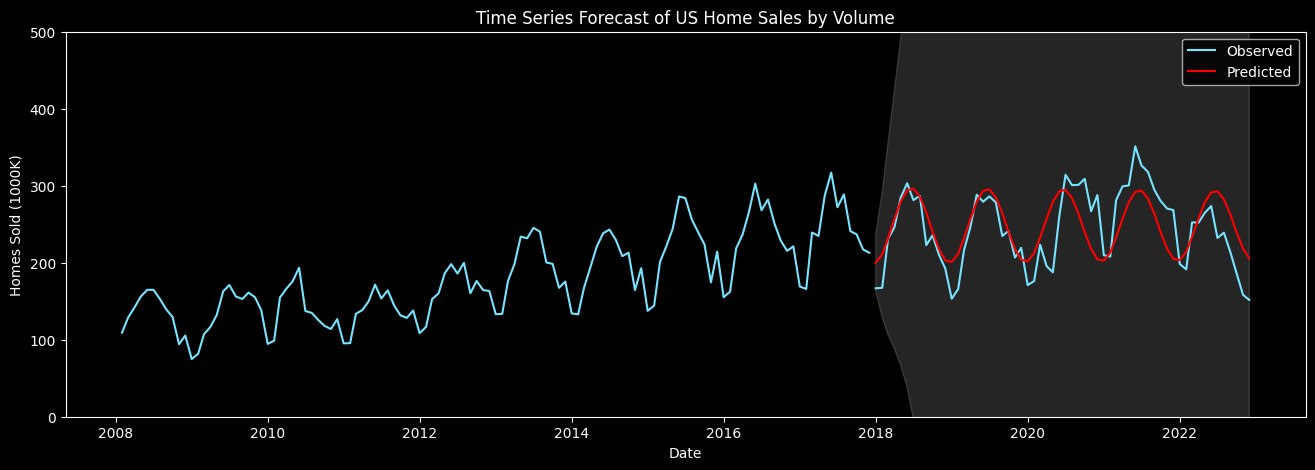

In [188]:
def forecast(provided_arima_model, periods, detrended_train_series, full_train_series, full_test_series):
    # Forecasting Performed
    fitted, conf_int = provided_arima_model.predict(n_periods = periods, return_conf_int=True)
    forecast_index = pd.date_range(detrended_train_series.index[-1] + pd.DateOffset(months=1), periods = periods, freq='MS')

    # Generate Series For Plotting
    predicted_values = pd.Series(fitted, index=forecast_index)
    lower_bound = pd.Series(conf_int[:, 0], index= forecast_index)
    upper_bound = pd.Series(conf_int[:, 1], index= forecast_index)

    # Transform Predicted Values To Include The Trend
    # Generate DataFrame For Each Of The Three Predictions (Forecasted Value, Lower Bound, Upper Bound)
    predicted_df, lower_df, upper_df = pd.DataFrame(predicted_values), pd.DataFrame(lower_bound), pd.DataFrame(upper_bound)

    # Rename Column Names Appropriately
    predicted_df.rename(columns={0 : 'sold'}, inplace=True)
    lower_df.rename(columns={0 : 'lower_bound'}, inplace=True)
    upper_df.rename(columns={0 : 'upper_bound'}, inplace=True)

    # Inner Join All Three DataFrames Into One
    predicted_df = predicted_df.join(lower_df, how='inner').join(upper_df, how='inner')

    # Concatenate Previous Row (2017-12-01) Data To The Forecasted Data
    forecast_2018 = pd.concat([last_row_2017, predicted_df])

    # Add Trend Back To The Data By Inversing Earlier diff() With cumsum()
    forecast_2018 = forecast_2018.cumsum()

    # Omit Previous Row Portion Of The DataFrame To Only Have 2018-2022 Data
    forecast_2018 = forecast_2018.loc['2018-01-01' : '2022-12-01'].copy()

    # Generate Mean Squared Error
    forecasted_mse = round(mean_squared_error(full_test_series, forecast_2018['sold'], squared=False),3)
    print(f"RMSE: {forecasted_mse}")

    # Plot The Forecast
    plt.figure(figsize=[16, 5])
    plt.plot(full_train_series, color="#77E4FF", label="Observed")
    plt.plot(full_test_series, color="#77E4FF")
    plt.plot(forecast_2018['sold'], color="red", label="Predicted")
    plt.fill_between(forecast_2018['lower_bound'].index, forecast_2018['lower_bound'], forecast_2018['upper_bound'], color='white', alpha= 0.15)
    plt.title(f"Time Series Forecast of US Home Sales by Volume")
    plt.xlabel("Date")
    plt.ylabel("Homes Sold (1000K)")
    plt.legend()

    # Zoom In On Plot
    plt.ylim(0,500);
    plt.show()
    
forecast(us_sales_arima_model, 60, detrend_train, us_sales_full_train, us_sales_full_test)

In [160]:
# Generate ARIMA Model Summary
us_sales_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  118
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -519.284
Date:                Sat, 02 Sep 2023   AIC                           1050.569
Time:                        02:16:59   BIC                           1067.193
Sample:                    03-01-2008   HQIC                          1057.319
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7289      0.010    177.773      0.000       1.710       1.748
ar.L2         -0.9971      0.008   -121.404      0.000      -1.013      -0.981
ma.L1         -2.3001      0.079    -29.162      0.000      -2.455      -2.146
ma.L2          1.9719      0.144     13.686      0.000       1.689       2.254
ma.L3         -0.5859      0.085     -6.929      0.000      -0.752      -0.420
sigma2       374.2787     61.710      6.065      0.000     253.330     495.228
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.92
Prob(Q):                              0.92   Prob(JB):                         0.14
Heteroskedasticity (H):               1.46   Skew:                            -0.44
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model summary reveals the implementation of a (2, 0, 3) ARIMA model with an AIC score of 1050. An in-depth examination of the plot unveils that the non-seasonal ARIMA model, while executed effectively, struggles in predicting the volume of homes sold throughout 2018. The model predominantly adheres to a baseline value established by the model itself, exhibiting minimal inclination to significantly diverge from this determined value. Incorporating the underlying trend back into the prediction yields an unsatisfactory outcome, as indicated by a root mean squared error of 36.967.

To enhance prediction accuracy by capturing the inherent seasonality, a prospective solution is the implementation of a SARIMA model. This, however, necessitates a strategic determination of the appropriate seasonal period. In this pursuit, the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots for the entire dataset prove invaluable. The selection process involves identifying the value that exhibits the most pronounced interval marked by statistical significance, manifesting beyond the demarcated region of statistical insignificance. The examination spans lag values up to 61 weeks, accounting for the inherent seasonal variance, which is inherently estimated at 60 weeks, but acknowledges the potential deviation from this anticipated value, as previously discussed.

### SARIMA

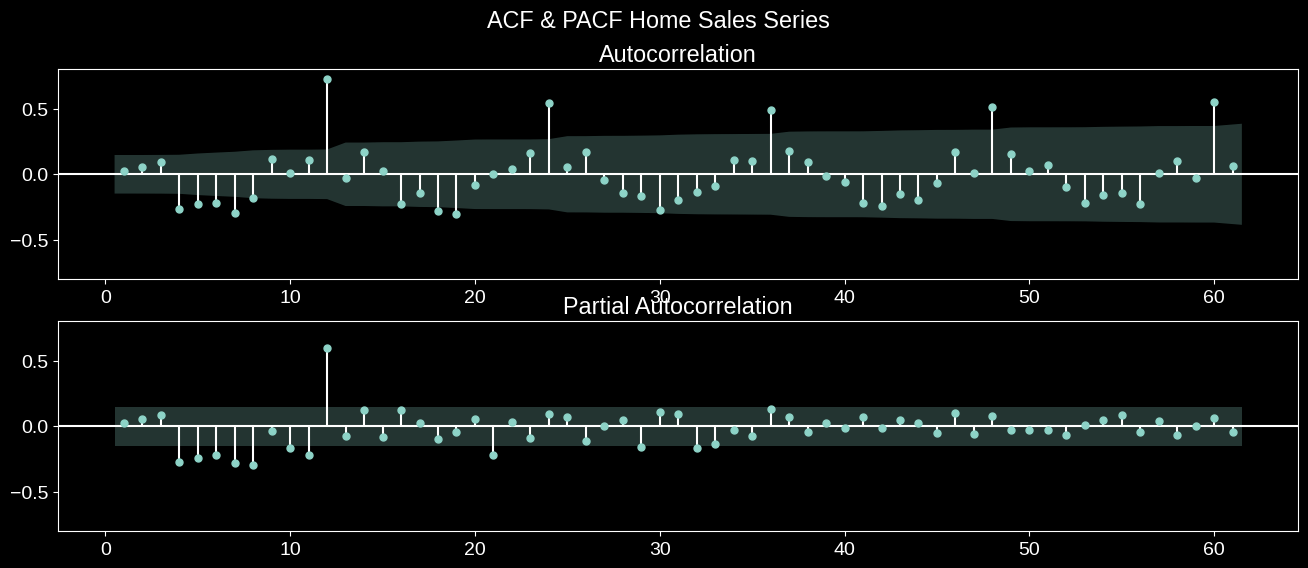

In [161]:
# Plot Autocorrelation & Partial Autocorrelation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[16,6], sharey=True)
plt.suptitle("ACF & PACF Home Sales Series")

# Plot ACF To 61 Lags
plot_acf(us_sales_detrend, lags=61, zero=False, ax=ax1);

# Plot PACF To 61 Lags
plot_pacf(us_sales_detrend, lags=61, zero=False, ax=ax2);

# Zoom In On Plot
plt.ylim(-0.8, 0.8);

The visual representations presented above underscore a notable observation: both the ACF and PACF plots exhibit statistically significant deviations from the baseline (indicated by the blue shaded region) precisely at the 12-month interval, manifesting as a lag-year mark. Evidently, this 12-month interval signifies a crucial juncture for the data's temporal dependencies. Consequently, the logical course of action entails the formulation and instantiation of a SARIMA model, characterized by a seasonal parameter of 12 months, effectively encapsulating the identified yearly seasonality.

RMSE: 56.439


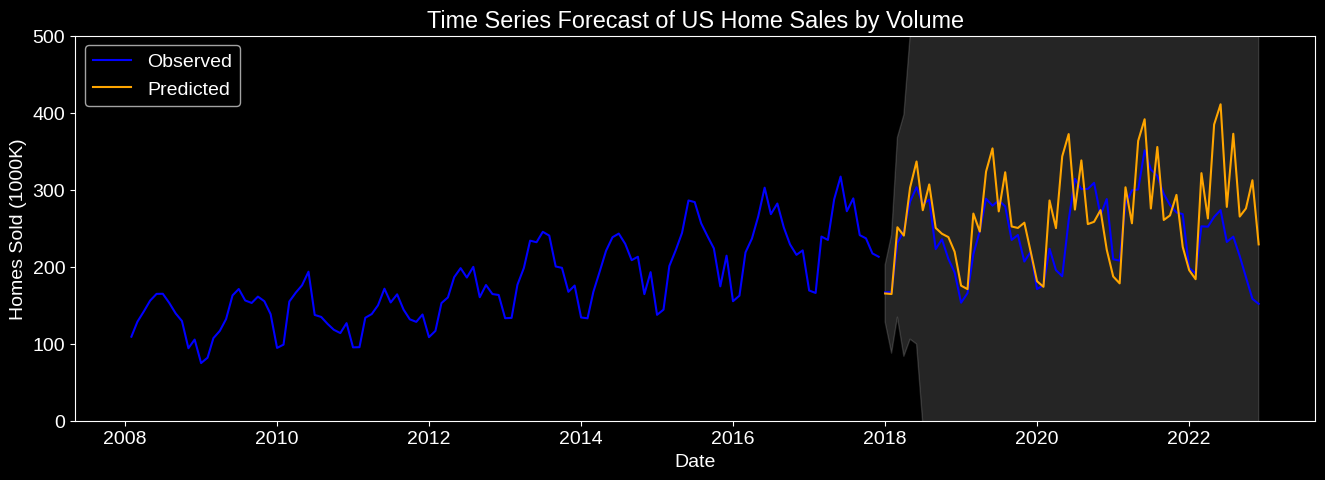

In [162]:
# Generate A SARIMA Model For Home Sales
us_sales_sarima_model = pm.auto_arima(detrend_train, 
                      start_p=0, start_q=0,
                      test='adf', # Finding Optimal 'd'
                      max_p=2, max_q=2, 
                      m=12, 
                      d=None, # Model Determines 'd'
                      seasonal=True,
                      D=2,
                      trace=False,
                      error_action='warn', # Verbose Errors
                      suppress_warnings=True,
                      stepwise=True)
forecast(us_sales_sarima_model, 60, detrend_train, us_sales_full_train, us_sales_full_test)

In [163]:
# Generate SARIMA Model Summary
us_sales_sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  118
Model:             SARIMAX(2, 0, 1)x(2, 2, [], 12)   Log Likelihood                -414.245
Date:                             Sat, 02 Sep 2023   AIC                            840.489
Time:                                     02:17:41   BIC                            855.749
Sample:                                 03-01-2008   HQIC                           846.653
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5888      0.099      5.918      0.000       0.394       0.784
ar.L2          0.1747      0.110      1.589      0.112      -0.041       0.390
ma.L1         -0.9868      0.115     -8.607      0.000      -1.211      -0.762
ar.S.L12      -0.7422      0.110     -6.722      0.000      -0.959      -0.526
ar.S.L24      -0.2804      0.110     -2.544      0.011      -0.496      -0.064
sigma2       355.9765     68.467      5.199      0.000     221.784     490.169
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.91
Prob(Q):                              0.72   Prob(JB):                         0.23
Heteroskedasticity (H):               0.67   Skew:                             0.16
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prophet

The summary of the model reveals the deployment of a (2, 0, 1) SARIMA model, characterized by an AIC score of 840 and a seasonal lag of 12. Interestingly, the root mean square error (RMSE) of this model markedly surpasses that of the ARIMA model, registering an RMSE of 56.439 as opposed to the preceding model's RMSE of 36.967. This outcome seemingly defies the conventional expectation, as a higher RMSE typically signifies a less effective model. However, a deeper examination of the situation uncovers a contrasting dynamic: although the RMSE is less favorable, the lower AIC score indicates an improvement in model quality. Upon scrutiny, it becomes evident that this model adheres more closely to the trajectory of the observed data. Notably, its predictions consistently tend toward lower estimates of home sales volume, yielding a pattern of underestimation across the spectrum.

Amidst the lackluster outcomes derived from both the ARIMA and SARIMA models in delivering a sufficiently accurate forecast, my quest for alternative time series analysis and forecasting tools commenced. During this exploration, I stumbled upon "Prophet," a noteworthy open-source time series analysis package made available in both Python and R. Authored by Facebook's Core Data Science team, Prophet is laudably documented and structured to function akin to the SciKit-Learn packages previously utilized within the MSDA program. What sets Prophet apart is its remarkable effectiveness in generating both univariate and multivariate time series forecasts. Of notable importance, the prerequisite for employing Prophet entails the meticulous arrangement of data. The variable of interest must be labeled as 'y,' while the date assumes a pivotal role as a dedicated column ('ds'). It is crucial to emphasize that the date should be incorporated as a column, rather than an index, which I have adhered to throughout this analysis.

In [164]:
# Recreate Training (2008-2017) & Testing Datasets (2018-2022) With 'sold' As 'y' & 'Date' As 'ds' Instead Of Index
temp_volume_df = pd.DataFrame(us_sales.copy())
temp_volume_df['ds'] = temp_volume_df.index
temp_volume_df.rename(columns={'sold' : 'y'}, inplace=True)

# Replace Index As An Integer Instead Of DateTime
temp_volume_df.reset_index(drop=True, inplace=True)
us_sales_train, us_sales_test = train_test_split(temp_volume_df, test_size=60, shuffle=False, random_state=369)

In [165]:
# Instantiate Prophet & Pass Argument Of Yearly Seasonality As True (Previous Generate Data Demonstrates It)
m = Prophet(yearly_seasonality=True)

# Fit To Training Data 
m.fit(us_sales_train)

# Generate A DataFrame For Predictions (2018-2022) Beginning With Date
future = m.make_future_dataframe(periods=60, freq='MS')
future.tail()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


,ds
174,2022-08-01
175,2022-09-01
176,2022-10-01
177,2022-11-01
178,2022-12-01


Upon generating the `future` dataframe, a distinctive observation comes to the forefront—the index extends expansively to encompass 178 entries. This expansion arises from the fact that when furnishing the model with historical data (i.e., the training data), Prophet ingeniously incorporates this historical data into the dataframe. Consequently, this augmentation leads to the creation of a dataframe that mirrors the extent of the original `us_sales` dataframe—comprising 179 entries—equivalent to 15 years, each containing 12 months.

Subsequently, upon invoking the `predict()` method of the fitted model, Prophet orchestrates the generation of several essential elements. Foremost is the predicted value for the designated index (`yhat`), flanked by a lower confidence interval (`yhat_lower`) and an upper confidence interval (`yhat_upper`). These components converge to facilitate a comprehensive comprehension of the forecasted trajectory.

In [166]:
# Populate DataFrame With Predictions From Time Series
forecast = m.predict(future)

''' 
ds = date
yhat = predicted_value
yhat_lower = confidence_interval
yhat_upper = upper_confidence_interval
''' 

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
174,2022-08-01,359.261897,338.969616,380.166382
175,2022-09-01,337.171441,316.157228,358.414615
176,2022-10-01,331.548710,311.017494,350.987939
177,2022-11-01,307.869403,286.083280,329.291190
178,2022-12-01,320.346222,298.581117,340.390249


Prophet boasts a proprietary pre-configured visualization mechanism tailored for its forecasts. This visualization encapsulates the historical assessments alongside the actual historical values. Remarkably, it seamlessly integrates the envisaged projections for the designated time frame, which, in the present context, encompasses the entirety from 2018 to 2022.

Furthermore, it merits mention that Prophet adeptly dissects the time series into its discernible constituents—namely the trend and seasonal facets. This comprehensive decomposition leads to the storage of an array of data within its forecast dataframe. While an in-depth exploration of this data lies beyond the scope of the current discussion, its significance warrants acknowledgment.

In [167]:
forecast.tail(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
176,2022-10-01,333.844512,311.017494,350.987939,328.200522,339.493164,-2.295803,-2.295803,-2.295803,-2.295803,-2.295803,-2.295803,0.0,0.0,0.0,331.548710
177,2022-11-01,335.218374,286.083280,329.291190,329.462998,341.073735,-27.348972,-27.348972,-27.348972,-27.348972,-27.348972,-27.348972,0.0,0.0,0.0,307.869403
178,2022-12-01,336.547919,298.581117,340.390249,330.683748,342.591079,-16.201696,-16.201696,-16.201696,-16.201696,-16.201696,-16.201696,0.0,0.0,0.0,320.346222


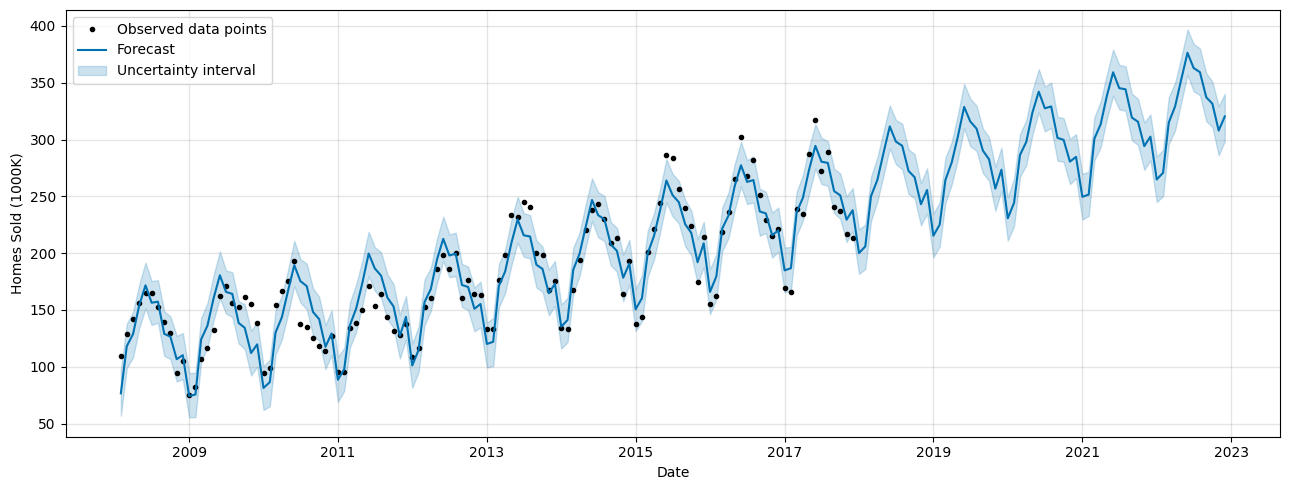

In [168]:
# Generate Prophet's Plot
plt.style.use("default")
fig1 = m.plot(forecast, figsize=(13,5), plot_cap=True, include_legend=True, ylabel='Homes Sold (1000K)', xlabel='Date')

In the absence of a technique that would enable the incorporation of the desired test series for the purpose of scrutinizing these estimates, the visual representation offered by Prophet's plotting does suggest a potentially robust alignment following the completion of the ensuing requisite stages.

RMSE: 65.15421927775361


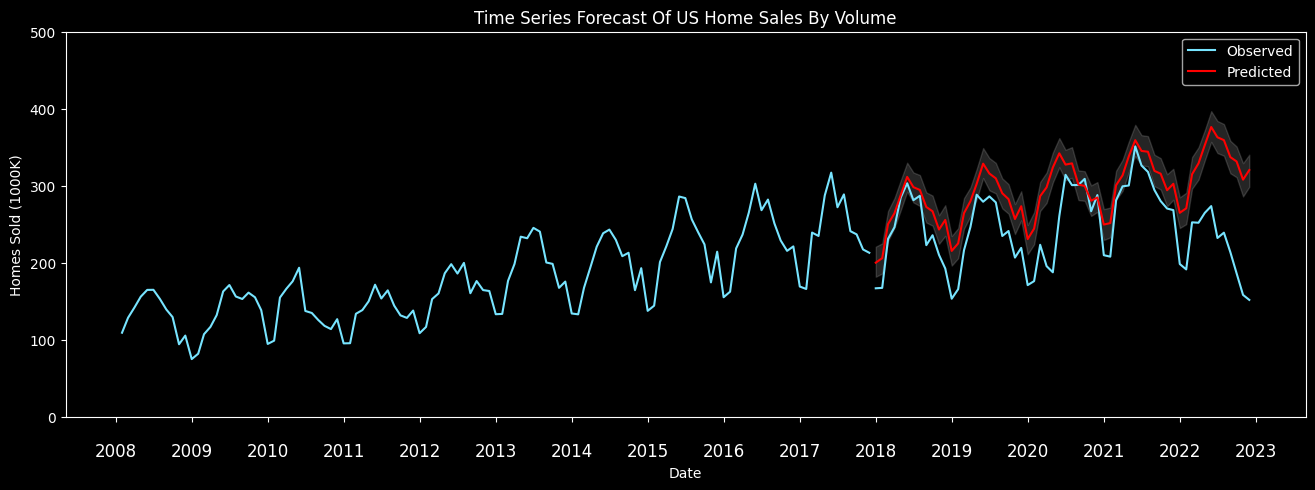

In [187]:
# Isolate Forecasted Values Into A Series To Easily Plot
temp_forecast = pd.DataFrame(forecast['yhat'][119:])
temp_forecast.index = us_sales_full_test.index
temp_forecast
print(f"RMSE: {mean_squared_error(us_sales_test['y'], temp_forecast, squared=False)}")

# Plot the forecast
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(us_sales_full_train, color="#77E4FF", label="Observed")
plt.plot(us_sales_full_test, color="#77E4FF")
plt.plot(temp_forecast, color="red", label="Predicted")
plt.fill_between(forecast['ds'][119:], forecast['yhat_lower'][119:], forecast['yhat_upper'][119:], color='white', alpha= 0.15)
plt.title(f"Time Series Forecast Of US Home Sales By Volume")
plt.xlabel("Date")
plt.ylabel("Homes Sold (1000K)")
plt.legend()
plt.tick_params(axis='x', labelsize=12, pad=15, rotation=0)
plt.xlim=["2008-02-01", "2022-12-01"]
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator())

# Zoom In On Axis
plt.ylim(0,500);
plt.show()

This model registers a root mean squared error of 65.154. This stands as slightly less favorable than the SARIMA model (56.430) and notably inferior to the ARIMA model's RMSE of 36.967. Nonetheless, this model presents an element of potential. It exhibits a notably smoother trajectory, characterized by reduced abrupt peaks and troughs in its estimations. Significantly, this model exudes a heightened level of confidence in its projections compared to its predecessors.

Furthermore, it adheres reasonably well to the trajectory of the observed data until the onset of 2022. It's in this year that it begins to progressively diverge from the observed data, resulting in a noticeable inaccuracy. This divergence can be attributed to the model's yet-to-be-perfected capacity to effectively account for exogenous factors, such as those indicated in the plot.

With this model showcasing promise, the subsequent step involved the execution of hyperparameter tuning. The code for this tuning is enclosed in the subsequent cell; however, its execution was deferred due to its protracted duration of requiring four hours to complete.


    param_grid = {  
        'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5], 
        'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
        'changepoint_range' : [0.8, 0.9, 0.95]
    }

    # Generate All Possible Combinations Of Parameters
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    rmses = []  # Store RMSE For Each Parameter

    # Cross Validation To Evaluate All Parameters
    for params in all_params:
        m = Prophet(**params, yearly_seasonality=True).fit(us_sales_train)  # Fit Model With Produced Params
        # df_cv = cross_validation(m, initial='740 days', period='365 days', horizon='365 days', parallel="processes")
        df_cv = cross_validation(m, horizon='30 days', parallel="processes")
        df_p = performance_metrics(df_cv, rolling_window=1)
        rmses.append(df_p['rmse'].values[0])

    # Attempt To Find The Best Parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results['rmse'] = rmses
    print(tuning_results)


The hyperparameter tuning conducted during this phase yielded an optimal combination of parameters, chosen based on the minimized root mean squared error. The selected parameters include a `changepoint_prior_scale` of 0.5, a `seasonality_prior_scale` of 1.0, and a changepoint_range` of 0.95.

- `changepoint_prior_scale` in Prophet is characterized as the degree of adaptability of the trend, specifically addressing the manner in which the trend transitions at its changepoints. According to the Prophet documentation, this parameter holds substantial significance, potentially leading to underfitting with excessively small values and overfitting with overly large values. The documentation draws parallels to the concept of a Lasso penalty. The default value for this parameter is 0.05, while the optimization process identified an optimal value of 0.5.

- `seasonality_prior_scale` in Prophet is characterized as the extent of adaptability of the seasonality, analogous to the concept of changepoint prior scale. Analogous to changepoint prior scale, an excessively small value may lead to underfitting, while an excessively large value could result in overfitting. Prophet also compares this parameter's function to that of an L2 penalty in Ridge regression. The default value for this parameter is 10.0, while the tuning process identified an optimal value of 1.0.

- `changepoint_range` in Prophet is described as the fraction of historical data within which alterations in the trend are permissible. The default value is 0.8, although our optimal value during hyperparameter tuning resulted with 0.95. This setting is intended to prevent the model from accommodating trend shifts exclusively in the final 20% of the time series, which could lead to overfitting due to limited space to fit the trend accurately near the series' conclusion. Despite the risk of overfitting, with a changepoint_range of 0.95 the model provided the most accurate fit versus the default value of 0.8.

Once the optimal hyperparameters were determined, they were subsequently incorporated into a final forecasting model.

In [170]:
# Generate A New Prophet Instance With Chosen Hyperparameters
f_model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.5, seasonality_prior_scale=1.0, changepoint_range=0.95)

# Fit Training Data
f_model.fit(us_sales_train)

# Generate A DataFrame For Predictions (2018-2022) Beginning With Date
final_future = f_model.make_future_dataframe(periods=60, freq='MS')

# Populate DataFrame With Predictions From Time Series
final_forecast = f_model.predict(final_future)

''' 
ds = date
yhat = predicted_value
yhat_lower = confidence_interval
yhat_upper = upper_confidence_interval
''' 

final_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


,ds,yhat,yhat_lower,yhat_upper
174,2022-08-01,284.152614,141.817408,439.054358
175,2022-09-01,262.433117,118.494657,422.882190
176,2022-10-01,255.181396,110.393595,421.731273
177,2022-11-01,229.593699,81.813575,401.449970
178,2022-12-01,242.795947,90.321649,415.011771


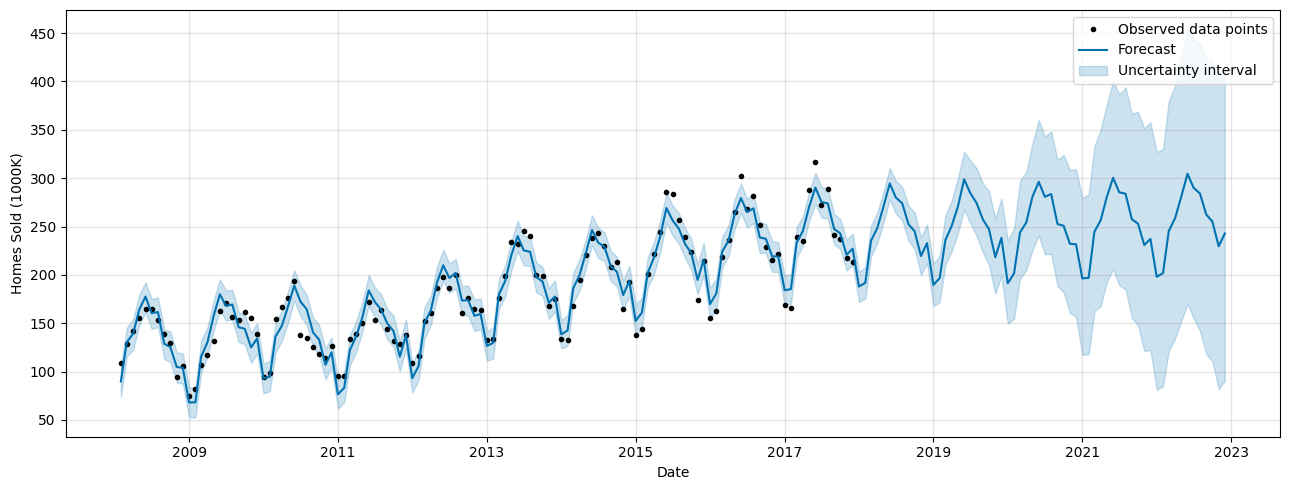

In [171]:
# Generate Prophet's Plot
plt.style.use("default")
fig1 = f_model.plot(final_forecast, figsize=(13,5), plot_cap=True, include_legend=True, ylabel='Homes Sold (1000K)', xlabel='Date')

RMSE: 35.64721849713231


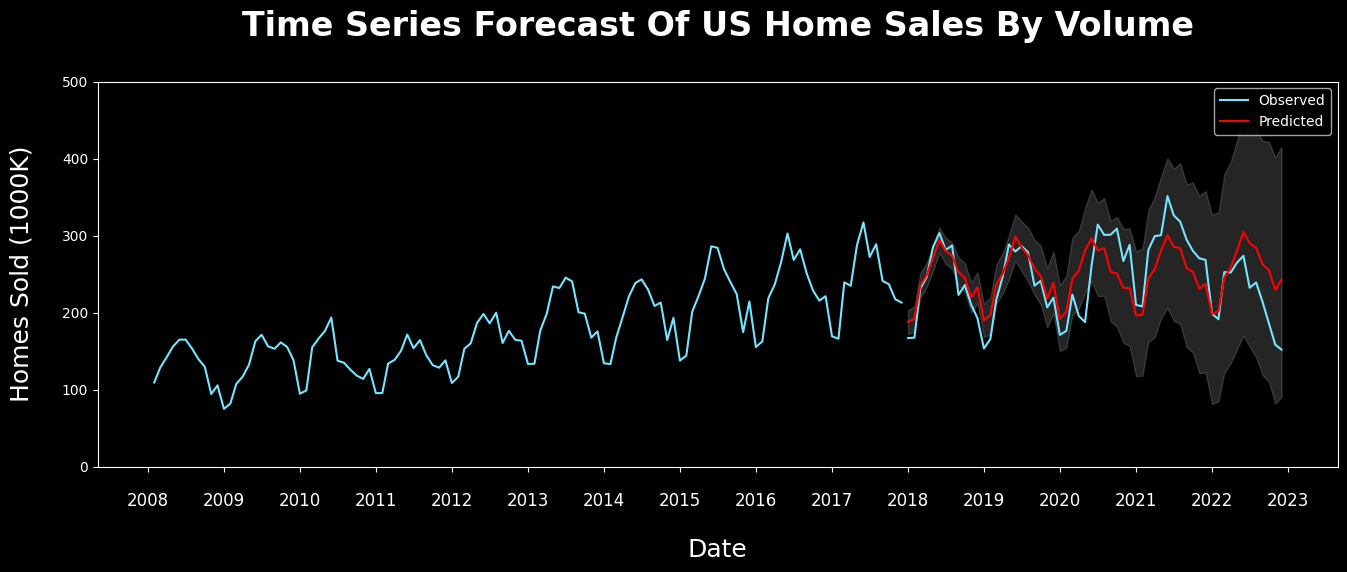

In [186]:
# Isolate Forecasted Values Into A Series For Plotting
temp_forecast = pd.DataFrame(final_forecast['yhat'][119:])
temp_forecast.index = us_sales_full_test.index
temp_forecast
print(f"RMSE: {mean_squared_error(us_sales_test['y'], temp_forecast, squared=False)}")

# Plot The Forecast
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(us_sales_full_train, color="#77E4FF", label="Observed")
plt.plot(us_sales_full_test, color="#77E4FF")
plt.plot(temp_forecast, color="red", label="Predicted")
plt.fill_between(final_forecast['ds'][119:], final_forecast['yhat_lower'][119:], final_forecast['yhat_upper'][119:], color='white', alpha= 0.15)
plt.title(f"Time Series Forecast Of US Home Sales By Volume", 
          fontweight='bold', fontsize=24, color='white', 
          y=1.05, pad=14, verticalalignment='bottom', horizontalalignment='center')
plt.xlabel("Date", fontsize=18, color='white', labelpad=20)
plt.ylabel("Homes Sold (1000K)", fontsize=18, color='white', labelpad=20, rotation=90)
plt.legend()
plt.tick_params(axis='x', labelsize=12, pad=15, rotation=0)
plt.xlim=["2008-02-01", "2022-12-01"]
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator())

# Zoom In On Axis
plt.ylim(0,500);
plt.show()

The concluding model achieves a root mean squared error (RMSE) of 35.647. This marks a notable enhancement compared to the initial Prophet model's RMSE of 65.154 and the initial SARIMA model's RMSE of 56.439.

While RMSE is valuable for comparing models based on the same data, it can be challenging to utilize it as a definitive measure of whether a model is good or effective due to its lack of normalization. Our final RMSE of 35 might indicate a strong performance relative to the other attempted models in this context, but it could represent significant error in a different scenario. The Mean Absolute Percentage Error (MAPE) provides a more straightforward assessment metric since it's standardized, expressing the percentage error between actual and forecasted values.

In [173]:
MAPE_18 = round(mean_absolute_percentage_error(us_sales_test['y'], temp_forecast), 3)
print(f"MAPE (Mean Absolute Percentage Error) Of 2018-2022 Forecast: {MAPE_18}")

MAPE (Mean Absolute Percentage Error) Of 2018-2022 Forecast: 0.127


The assessment of a "commendable" or "precise" MAPE score is primarily contingent upon the intricacies inherent to the challenge, as an objective demarcation that segregates a "commendable" MAPE score from a "satisfactory" one or even a "subpar" one remains elusive. Nevertheless, a widely embraced heuristic posits that a MAPE below 10% epitomizes a remarkably accurate projection, whereas a value below 20% is regarded as meritorious, and a range spanning 20% to 50% may be construed as acceptable. Based on my own research, it appears that this heuristic has garnered popularity without a robust foundation.

Derived from this exploration, the proposition for this analysis advocated for a threshold of 20% MAPE or a superior (lower) value as the yardstick for successfully devising an efficacious predictive model. As events unfolded, this model culminated with a MAPE of 12.7%, delicately poised on the brink of the threshold that designates it as a "good accurate" model, effortlessly surpassing the criterion delineated by this analysis, thereby rendering the model effective. Given that this model was honed using a decade's worth of data, the crafting of a more adept model achieving such caliber is distinctly attainable through the assimilation of additional historical data. It is also worth noting that Zillow Research unveils specific household units through their API service, which remains beyond the purview of public access. Gaining entry to this repository of data would likely bestow enhancements upon the model's performance.

<a id='PartE'></a>
## <span style="color:green">E: Data Summary & Implications</span>

This analysis began by establishing the following hypotheses:

<ul class="a"><b>Null Hypothesis</b>
An effective predictive time series forecasting model with a mean absolute percentage error of <20% can *not* be generated from the research dataset.
</ul>
<ul class="a"><b>Alternative Hypothesis</b>
An effective predictive time series forecasting model with a mean absolute percentage error of <20%' can be generated from the research dataset.
</ul>

The conclusive, refined forecasting model, formulated utilizing "prophet," exhibited a mean absolute percentage error (MAPE) of 12.7%. This model effortlessly surmounts the stipulated threshold articulated within the null hypothesis, wherein a MAPE of 20% or less was designated. Consequently, we reject the null hypothesis in favor of the alternate hypothesis, concluding that the generation of an effective time series forecasting model from the research dataset is indeed attainable. Intriguingly, the MAPE of this definitive model lies within a spectrum that designates it as not merely a "good" or "adequate" forecasting model, but rather a "highly accurate" one. Within this framework, it is undeniable that this project stands as an unequivocal triumph in its capacity to prognosticate metropolitan area home sales by volume.

While I am greatly impressed by the model's prowess, it is incumbent upon us to recognize certain limitations inherent in this analysis. The most notable constraint pertains to the absence of direct access to the raw home sales data, a facet typically acquired through HAR or MLS by means of an application programming interface (API). Employing an API furnishes the analyst with the ability to selectively retrieve data, concentrating on model fitting and performance instead of grappling with data cleaning and preparation.

In an expansion of this project's ambit, my aspiration is to identify a dependable source for procuring historical finalized selling prices of listed homes, with a specific focus on single-family residential properties. Such data would serve as an authentic indicator of market supply and demand vis-à-vis estimated home valuations. Following the acquisition of this dataset, my intention is to automate the data cleansing and preparation stages using Python, thereby allocating a substantial portion of time, approximately 90%, toward model validation.

With the culmination of this undertaking, my contemplation shifts toward the pursuit of an automated time series forecasting model avenue. The inception would encompass procuring both home sales and home sold prices from a dependable API service like HAR or MLS. Automation of the data cleaning and preparation stages to store the data within a database would be orchestrated, followed by the establishment of a pipeline connecting diverse time series forecasting models to the dataset. I hold a genuine appreciation for the insights gained into hyperparameter tuning techniques, which prove invaluable when navigating the nuances of "exogenous factors."

<a id='PartF'></a>
## <span style="color:green">F: Source References</span>

```
Housing data - Zillow Research. (2023, April 25). Zillow. 
    https://www.zillow.com/research/data/

Ma, B. (2021c, December 13). Time Series Modeling with ARIMA to Predict Future House Price. Medium. 
    https://towardsdatascience.com/time-series-modeling-with-arima-to-predict-future-house-price-9b180c3bbd2f

Cphalpert. (n.d.). census-regions/us census bureau regions and divisions.csv at master · cphalpert/census-regions. GitHub. 
    https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv

Maverickss. (2023). Time Series Forecasting using ARIMA/SARIMA/SARIMAX. Kaggle. 
    https://www.kaggle.com/code/maverickss26/time-series-forecasting-using-arima-sarima-sarimax

Li, S. (2018, November 30). An End-to-End Project on Time Series Analysis and Forecasting with Python. Medium. 
    https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
```

<a id='PartG'></a>
## <span style="color:green">G: Code References</span>

```
Kumar, S. (2022, April 30). 4 Techniques to Handle Missing values in Time Series Data. Medium. 
    https://towardsdatascience.com/4-techniques-to-handle-missing-values-in-time-series-data-c3568589b5a8

Admin. (2023). How to format pandas datetime? Spark by {Examples}. 
    https://sparkbyexamples.com/pandas/how-to-format-pandas-datetime/

How do I compare columns in different data frames? (n.d.). Data Science Stack Exchange. 
    https://datascience.stackexchange.com/questions/33053/how-do-i-compare-columns-in-different-data-frames

Poet, D. (2018, April 2). Cleaning data in pandas - dead poet - medium. Medium. 
    https://medium.com/@deadpoet1208_28903/cleaning-data-in-pandas-2620b881b04f

Talk, M. D. (2023, January 18). Reshaping a Pandas dataframe: Long-to-Wide and vice versa. Medium. 
    https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad

Anshuls. (2020). Time Series Forecasting-EDA, FE & Modelling📈. www.kaggle.com. 
    https://www.kaggle.com/code/anshuls235/time-series-forecasting-eda-fe-modelling
```